Choose a tidy dataset that can be used for regression. Where there is a response variable y and predictors x. 

In [8]:
!pip3 install -U ucimlrepo 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip3 install pygam

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------- ----------------- 1.0/1.8 MB 5.9 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 4.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
import statsmodels.api as sm
from pygam import LinearGAM, s
from scipy.spatial.distance import cdist
from ucimlrepo import fetch_ucirepo 
from sklearn.impute import SimpleImputer
import joblib
import ctypes
from statsmodels.nonparametric.kernel_regression import KernelReg
import subprocess
import re
from scipy import stats


# Change the max columns display setting to None to display all columns
pd.set_option('display.max_columns', None)
# Change the max rows display setting to None to display all rows
pd.set_option('display.max_rows', None)

In [34]:
# Count the number of rows
row_count = len(X)
print(row_count)

99826


In [ ]:
# Print metadata to check if there's a target variable
print(apt.metadata) #regression for the squares feet column

# View the first 5 rows of the DataFrame
print(X.head())  # For the feature DataFrame

{'uci_id': 555, 'name': 'Apartment for Rent Classified', 'repository_url': 'https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified', 'data_url': 'https://archive.ics.uci.edu/static/public/555/data.csv', 'abstract': 'This is a dataset of classified for apartments for rent in USA.\n', 'area': 'Business', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 10000, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': None, 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5X623', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains of 10'000 or 100'000 rows and of 22 columns The data has been cleaned in the way that \r\ncolumn price and square_feet never is empty but the dataset is saved as it was created.\r\n\r\n

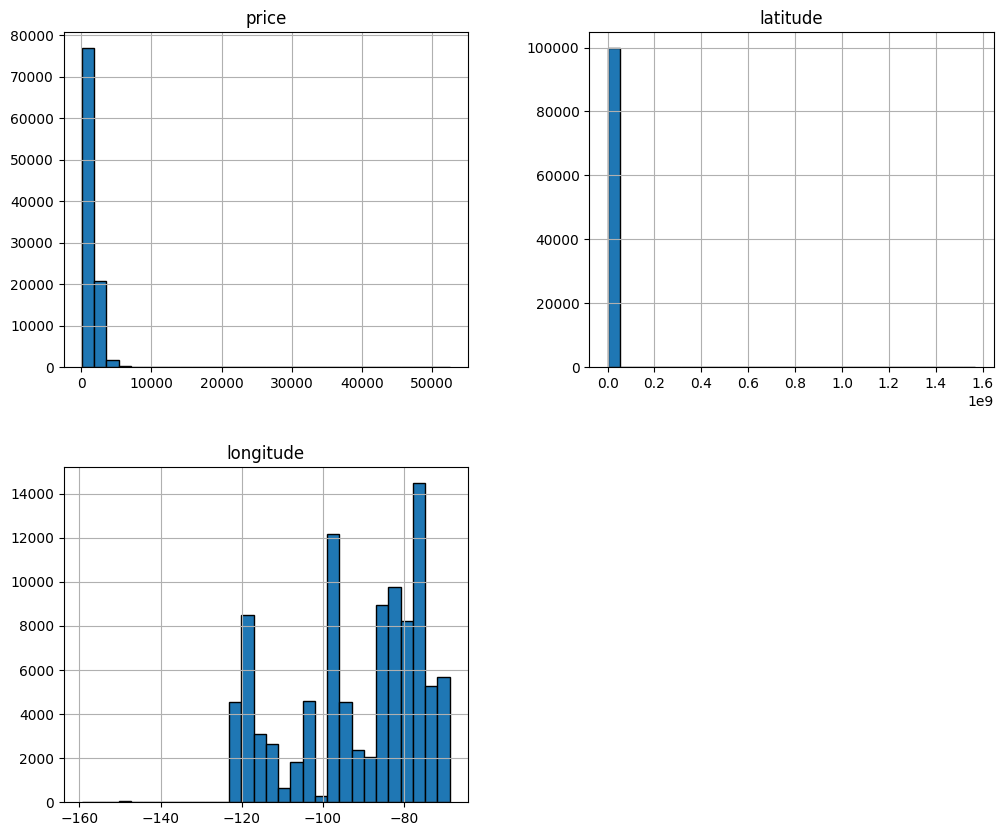

In [16]:
# Plot histogram for numeric data! to see all numeric data distributions

X2 = X.drop(columns=['time','title', 'body', 'address'])

# Plot histogram for each numeric column
X2.hist(figsize=(12, 10), bins=30, edgecolor='black')
# plt.tight_layout()
plt.show()

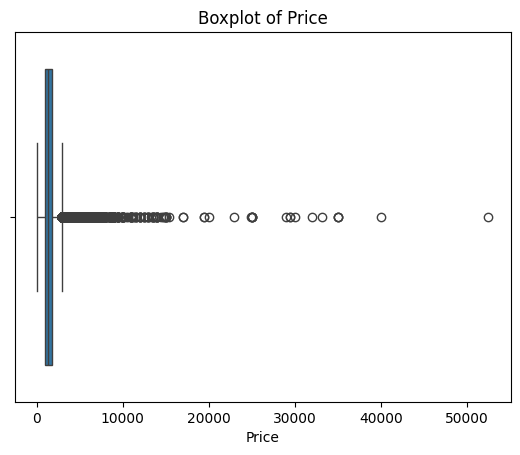

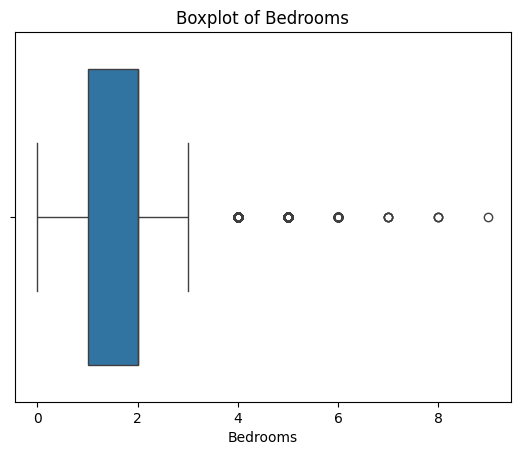

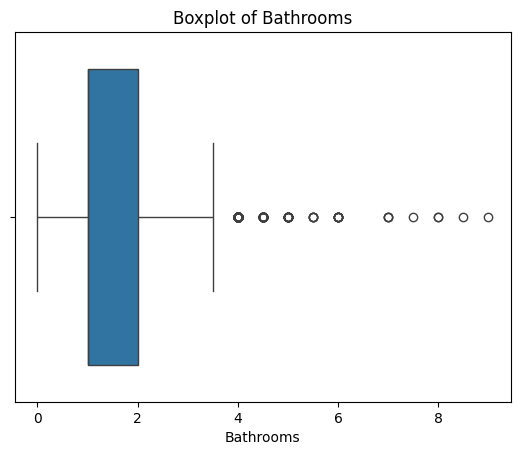

In [14]:
# Plot box plots 

# Price
sns.boxplot(x=df['price'])

plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

# Bedrooms
sns.boxplot(x=df['bedrooms'])

plt.title('Boxplot of Bedrooms')
plt.xlabel('Bedrooms')
plt.show()

# Bedrooms
sns.boxplot(x=df['bathrooms'])

plt.title('Boxplot of Bathrooms')
plt.xlabel('Bathrooms')
plt.show()


Statistical Summary

In [12]:
# Stat Summary for Numeric Columns

# Get statistical summary for numerical variables
summary = X.describe()
print(summary)

              price      latitude     longitude          time
count  99821.000000  9.979700e+04  99795.000000  9.982000e+04
mean    1527.208493  3.147604e+04    -91.562177  1.559690e+09
std      903.635759  7.022820e+06     15.819296  1.104487e+07
min      100.000000  1.957380e+01   -159.369800  1.544174e+09
25%     1014.000000  3.374960e+01   -104.791900  1.550832e+09
50%     1350.000000  3.722970e+01    -84.562300  1.568745e+09
75%     1795.000000  3.995390e+01    -77.585300  1.568767e+09
max    52500.000000  1.568782e+09    -68.778800  1.577391e+09


In [20]:
# Summary for all column types
X3 = X.drop(columns=['title','body','currency','fee','has_photo','pets_allowed','price_display','price_type','state','source','category','amenities','address','cityname']) #id doesn't exit in X
full_summary = X3.describe(include='all')
print(full_summary)

       bathrooms bedrooms         price square_feet      latitude  \
count      99760    99699  99821.000000       99823  9.979700e+04   
unique        26       19           NaN        4188           NaN   
top            1        2           NaN        1000           NaN   
freq       55669    45441           NaN        1047           NaN   
mean         NaN      NaN   1527.208493         NaN  3.147604e+04   
std          NaN      NaN    903.635759         NaN  7.022820e+06   
min          NaN      NaN    100.000000         NaN  1.957380e+01   
25%          NaN      NaN   1014.000000         NaN  3.374960e+01   
50%          NaN      NaN   1350.000000         NaN  3.722970e+01   
75%          NaN      NaN   1795.000000         NaN  3.995390e+01   
max          NaN      NaN  52500.000000         NaN  1.568782e+09   

           longitude          time  
count   99795.000000  9.982000e+04  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN   

In [22]:
# only price
price_summary = X['price'].describe()
print(price_summary)

count    99821.000000
mean      1527.208493
std        903.635759
min        100.000000
25%       1014.000000
50%       1350.000000
75%       1795.000000
max      52500.000000
Name: price, dtype: float64


Data Preprocessing

In [7]:
# Check the distribution of outcome variable in the dataset
print("Price variable distribution:")
print(y.value_counts())

Price variable distribution:
price
1350.0    576
850.0     548
1200.0    539
950.0     530
1100.0    525
         ... 
6420.0      1
4165.0      1
5775.0      1
3804.0      1
4593.0      1
Name: count, Length: 3691, dtype: int64


Data Inspection

In [38]:
# Print number of rows and missing data before dropping
print("Before dropping missing values:")
print(df.isnull().sum())  # Check missing values in each column
print(f"Number of rows before dropping: {df.shape[0]}")

Before dropping missing values:
bathrooms           0
bedrooms            0
fee                 0
has_photo           0
pets_allowed        0
state               0
latitude            0
longitude           0
price           99825
dtype: int64
Number of rows before dropping: 99825


In [35]:
#Check if any column contains 'No' (excluding NaN)
no_counts = df.apply(lambda col: col.str.contains('No', na=False).sum() if col.dtype == 'object' else 0)

print(no_counts)

# Check if any column contains 'Thumbnail' (excluding NaN)
no_counts = df.apply(lambda col: col.str.contains('Thumbnail', na=False).sum() if col.dtype == 'object' else 0)

print(no_counts)

# Check if there's any possible non-numeric value in "bathrooms" variable
# Convert 'bathrooms' column to numeric, coercing errors (non-numeric values will become NaN)
df['bathrooms_numeric'] = pd.to_numeric(df['bathrooms'], errors='coerce')

# Find rows where 'bathrooms' contains non-numeric values (i.e., where 'bathrooms_numeric' is NaN)
non_numeric_bathrooms = df[df['bathrooms_numeric'].isna()]

# Display the rows with non-numeric values
print(non_numeric_bathrooms)

# Ensure all categorical columns are strings
categorical_features = ['bedrooms', 'fee', 'has_photo', 'pets_allowed', 'state']
for col in categorical_features:
    df[col] = df[col].astype(str)

# Check if the column types are as expected
print(df[categorical_features].dtypes)

bedrooms        object
fee             object
has_photo       object
pets_allowed    object
state           object
dtype: object


For this project:
X = bathrooms, bedrooms, fee, has_photo, pets_allowed, state, latitude, longitude
y = price

## Data Cleaning, Preprocessing, Feature Engineering, Merging

- fetch the dataset
- select features and target
- create dataframe with ^
- clean up the problematic "bathrooms" variable: remove "Thumbnail" and change "No" to 0
- convert "bedrooms" variable to numeric
- impute missing values: especially pets_allowed that has 60,634 missing values.. for numeric columns, they are filled with the median value. Numeric are bedrooms, bathrooms, latitude, longitude. Bedrooms (127 missing), bathrooms(66), latitude (29), longitude (31). Categorical variables are filled with the mode value. Categorical are fee (3), has_photo (3), pets_allowed (60,364), state (305), latitude (29), longitude (31).
- column preprocessing with ColumnTransformer (scale numeric features, encode categorical features)
- target transformation: convert target variable to a float64 type, align this target variable to transformed feature matrix using original dataframe index, so that it matches the correct X feature even after encoding
- y is cleaned and imputed


In [3]:
# Fetch dataset
apt = fetch_ucirepo(id=555)

# Since 'apt' doesn't have a target variable, manually assign the 'price' as the target
X = apt.data.features.reset_index(drop=True)
y = X['price']  # Manually create the target 'price' variable

# Select features and target
features = ['bathrooms', 'bedrooms', 'fee', 'has_photo', 'pets_allowed',
            'state', 'latitude', 'longitude']
target = 'price'

# Create DataFrame and assign target (now 'price' is manually set as y)
df = X[features].copy()
df[target] = y.values  # Assign by position to avoid index misalignment

# Print number of rows and missing data before imputation
print("Before imputation:")
print(df.isnull().sum())  # Check missing values in each column
print(f"Number of rows before imputation: {df.shape[0]}")

# Replace 'No' with 0 and remove 'Thumbnail' in 'bathrooms' column
df['bathrooms'] = df['bathrooms'].replace('No', 0)
df = df[df['bathrooms'] != 'Thumbnail']
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df = df[df['bathrooms'] >= 0]

# Convert columns to numeric where necessary
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

# Define feature groups
numeric_features = ['bathrooms', 'bedrooms', 'latitude', 'longitude']
categorical_features = ['fee', 'has_photo', 'pets_allowed', 'state']

# Impute missing values
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

# Print number of rows and missing data after imputation
print("After imputation:")
print(df.isnull().sum())
print(f"Number of rows after imputation: {df.shape[0]}")

# Redefine feature groups for encoding
numeric_features = ['bathrooms', 'bedrooms', 'latitude', 'longitude']
categorical_features = ['fee', 'has_photo', 'pets_allowed', 'state']

# ColumnTransformer to handle numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# Fit-transform the features
X_transformed = preprocessor.fit_transform(df[features])

# Convert target to float64 and align with index
y_clean = df[target].astype(np.float64).loc[df.index]

# Check for empty dataset
if X_transformed.shape[0] == 0:
    raise ValueError("Transformed data has 0 samples. Ensure that your data preprocessing is correct.")

# Retrieve transformed feature names
ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, cat_feature_names])

# Check feature alignment
if X_transformed.shape[1] != len(feature_names):
    raise ValueError(f"Feature name count ({len(feature_names)}) does not match transformed data columns ({X_transformed.shape[1]}).")

# Create encoded DataFrame
X_encoded_df = pd.DataFrame(X_transformed, columns=feature_names, index=df.index)
X_encoded_df = X_encoded_df.astype(np.float64)

# Create an imputer for the 'price' target (y_clean)
imputer = SimpleImputer(strategy='median')  

# Reshape y_clean to 2D for imputation and keep the index
y_clean_reshaped = y_clean.values.reshape(-1, 1)

# Fit the imputer and transform y_clean
y_clean_imputed = imputer.fit_transform(y_clean_reshaped)

# Convert back to a pandas Series and align with the index
y_clean_imputed = pd.Series(y_clean_imputed.flatten(), index=y_clean.index)

# Ensure that the index is the same and no values are missing
print("Missing values after imputation:")
print(y_clean_imputed.isnull().sum())  
print(f"Shape of imputed y: {y_clean_imputed.shape}")

# merge the X and y
final_df = X_encoded_df.copy()
final_df['price'] = y_clean_imputed


c:\Users\mieme\Downloads\venv\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Before imputation:
bathrooms          66
bedrooms          127
fee                 3
has_photo           3
pets_allowed    60634
state             305
latitude           29
longitude          31
price               5
dtype: int64
Number of rows before imputation: 99826
After imputation:
bathrooms       0
bedrooms        0
fee             0
has_photo       0
pets_allowed    0
state           0
latitude        0
longitude       0
price           1
dtype: int64
Number of rows after imputation: 99759
Missing values after imputation:
0
Shape of imputed y: (99759,)


## More EDA after this preprocessing!

Boxplot and histogram just for the numeric

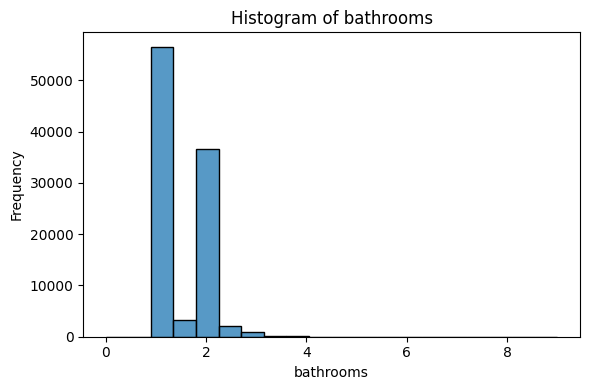

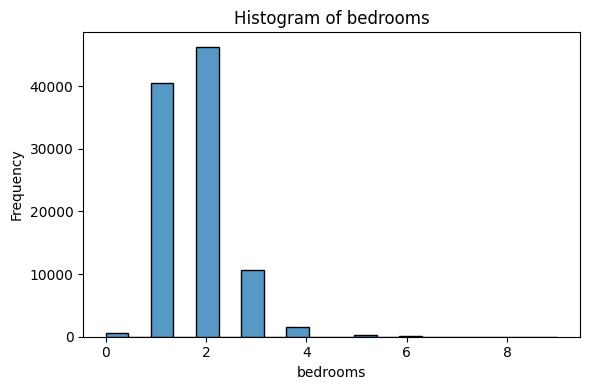

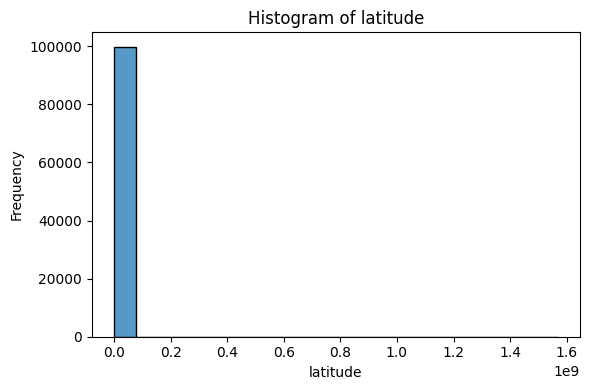

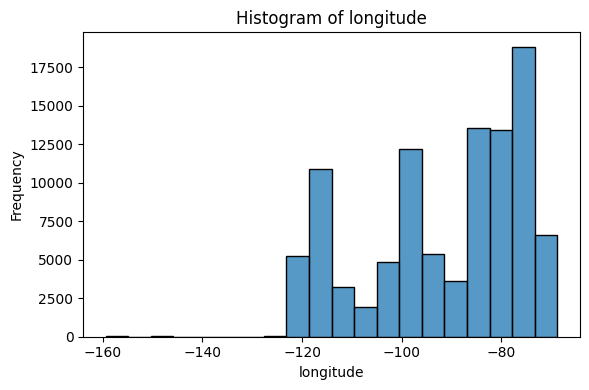

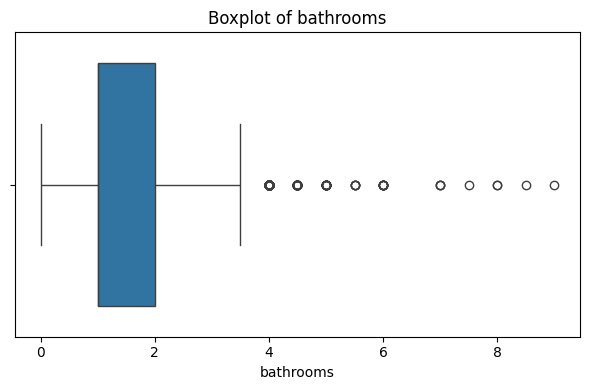

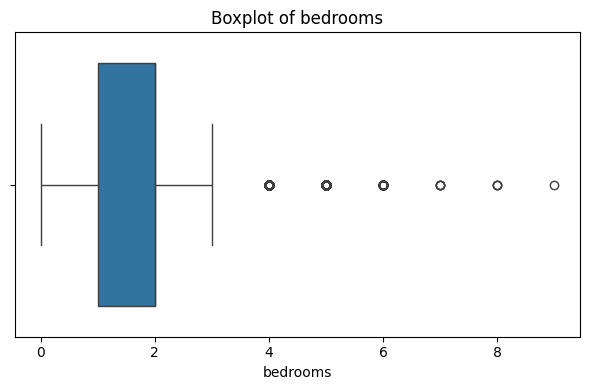

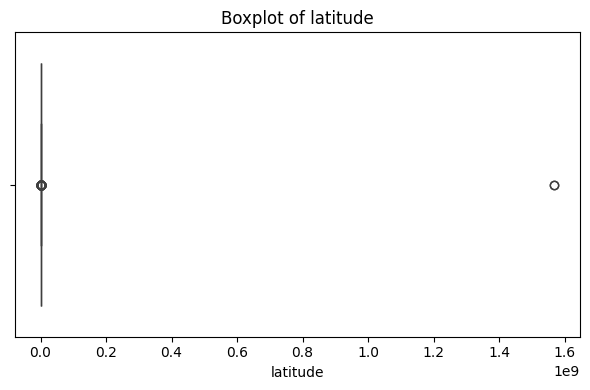

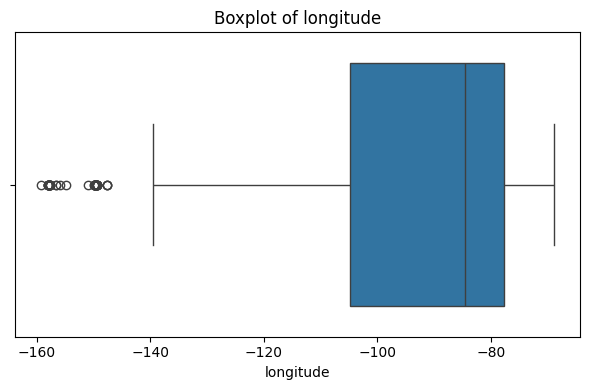

In [10]:
numeric_features = ['bathrooms', 'bedrooms', 'latitude', 'longitude']

for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=False, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


Correlation Analysis between each feature and target variable

In [ ]:
# # One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['bedrooms', 'fee', 'has_photo', 'pets_allowed', 'state'])

# Now calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract correlation with target variable
correlation_with_target = correlation_matrix['price']

# Take absolute value and sort descending
correlation_sorted = correlation_with_target.abs().sort_values(ascending=False)

# Print the result
print(correlation_sorted)

price                          1.000000
state_CA                       0.352342
bathrooms                      0.328218
state_MA                       0.169679
bedrooms_1.0                   0.164644
bedrooms_6.0                   0.156298
state_NJ                       0.122639
bedrooms_5.0                   0.118513
state_TX                       0.115338
bedrooms_4.0                   0.113021
state_NC                       0.107571
longitude                      0.106597
state_OH                       0.104885
bedrooms_3.0                   0.100827
state_NY                       0.092773
bedrooms_7.0                   0.089225
state_AZ                       0.070562
state_NE                       0.066796
state_NV                       0.066755
state_LA                       0.065264
state_KS                       0.064700
state_KY                       0.059635
state_MO                       0.058519
state_AR                       0.056087
state_ND                       0.055750


In [ ]:
# where is price the highest and lowest?
df[df['price'] == 52500] #max

bathrooms  bedrooms fee  has_photo pets_allowed state  latitude  \
6863        1.0       0.0  No  Thumbnail    Cats,Dogs    CA    34.887   

      longitude    price  
6863   -117.035  52500.0

In [4]:
df[df['price'] == 100] #min

bathrooms  bedrooms  fee  has_photo pets_allowed state  latitude  \
52126        1.0       2.0  Yes  Thumbnail    Cats,Dogs    CT   41.7856   

       longitude  price  
52126    -72.673  100.0

In [5]:
# df
# X
# X_encoded_df
print(df.head())

   bathrooms  bedrooms fee  has_photo pets_allowed state  latitude  longitude  \
0        1.0       1.0  No  Thumbnail         Cats    CA   33.8520  -118.3759   
1        1.5       3.0  No  Thumbnail    Cats,Dogs    VA   37.0867   -76.4941   
2        2.0       3.0  No  Thumbnail    Cats,Dogs    NC   35.8230   -78.6438   
3        1.0       2.0  No  Thumbnail    Cats,Dogs    CA   38.3622  -121.9712   
4        1.0       1.0  No  Thumbnail    Cats,Dogs    NM   35.1038  -106.6110   

    price  
0  2195.0  
1  1250.0  
2  1395.0  
3  1600.0  
4   975.0  


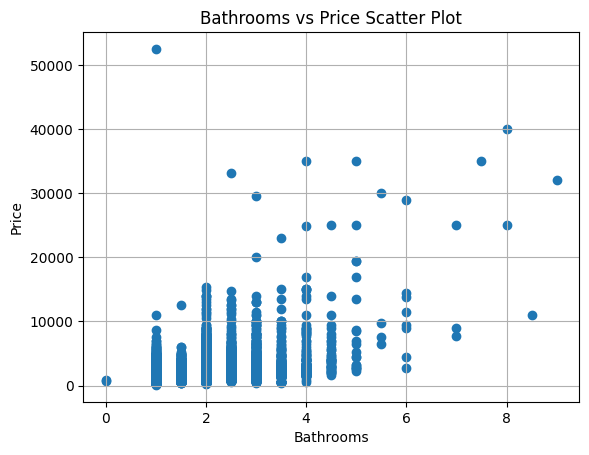

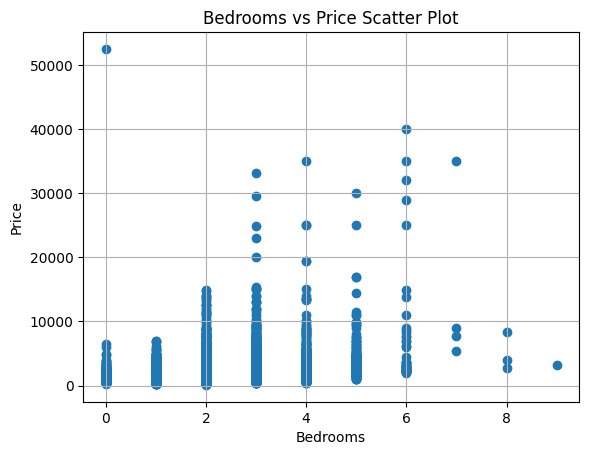

In [40]:
# X and y plot of bathrooms and price 
# X and y plot of bedrooms and price 

x2 = df['bathrooms']
x3 = df['bedrooms']
y = y_clean_imputed

plt.scatter(x2, y)
plt.title("Bathrooms vs Price Scatter Plot")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.grid(True)
plt.show()

plt.scatter(x3, y)
plt.title("Bedrooms vs Price Scatter Plot")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.grid(True)
plt.show()

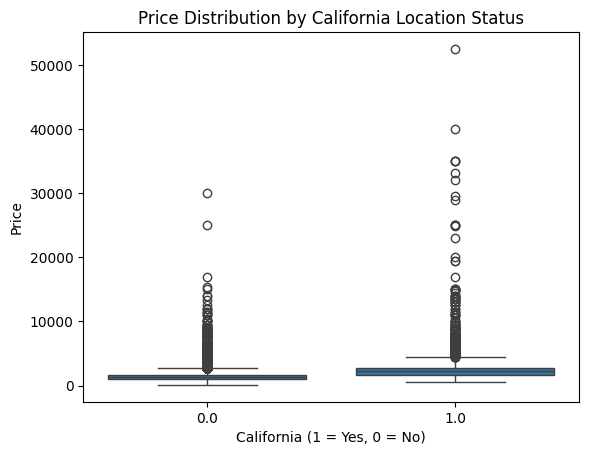

In [41]:
x1 = X_encoded_df['state_CA']

# X and y plot of California and price
sns.boxplot(x=x1, y=y, data=X_encoded_df)
plt.xlabel('California (1 = Yes, 0 = No)')
plt.ylabel('Price')
plt.title('Price Distribution by California Location Status')
plt.show()

In [ ]:
print(final_df.groupby('state_CA')['price'].mean())
print(df.groupby('bathrooms')['price'].mean()) #use df because this is before it's scaled
print(df.groupby('bedrooms')['price'].mean())

state_CA
0.0    1419.139419
1.0    2461.169859
Name: price, dtype: float64
bathrooms
0.0      752.500000
1.0     1338.284202
1.5     1395.473007
2.0     1730.560647
2.5     2098.120979
3.0     2808.325477
3.5     2920.497608
4.0     4698.900000
4.5     5138.666667
5.0     9692.500000
5.5    13450.000000
6.0    11806.250000
7.0    13900.000000
7.5    35000.000000
8.0    32500.000000
8.5    11000.000000
9.0    32000.000000
Name: price, dtype: float64
bedrooms
0.0     1407.040123
1.0     1347.207996
2.0     1579.000627
3.0     1791.950109
4.0     2354.063333
5.0     3525.059441
6.0     7567.934783
7.0    14263.750000
8.0     5015.000000
9.0     3195.000000
Name: price, dtype: float64


In [11]:
# Statistical test to confirm significance for california
from scipy.stats import ttest_ind
x1 = X_encoded_df['state_CA']

group1 = y[x1 == 1]
group0 = y[x1 == 0]

print("Group 1 mean:", group1.mean())
print("Group 0 mean:", group0.mean())

t_stat, p_val = ttest_ind(group1, group0)

if p_val < 0.05:
    print("The difference in means is statistically significant (reject H0)")
else:
    print("No statistically significant difference in means (fail to reject H0)")

print(p_val)

Group 1 mean: 2461.1698587734572
Group 0 mean: 1419.13941904027
The difference in means is statistically significant (reject H0)
0.0


In [ ]:
# Statistical test to confirm significance for bathrooms 0 vs 1

group1 = y[x2 == 1]     
group0 = y[x2 == 0]

print("Group 1 mean:", group1.mean())
print("Group 0 mean:", group0.mean())

t_stat, p_val = ttest_ind(group1, group0)

if p_val < 0.05:
    print("The difference in means is statistically significant (reject H0)")
else:
    print("No statistically significant difference in means (fail to reject H0)")

print(p_val)

Group 1 mean: 1338.2844090152616
Group 0 mean: 752.5
No statistically significant difference in means (fail to reject H0)
0.18906117195554117


In [14]:
# Statistical test to confirm significance for bathrooms 1 vs 2

group1 = y[x2 == 1]
group0 = y[x2 == 2]

print("Group 1 mean:", group1.mean())
print("Group 0 mean:", group0.mean())

t_stat, p_val = ttest_ind(group1, group0)

if p_val < 0.05:
    print("The difference in means is statistically significant (reject H0)")
else:
    print("No statistically significant difference in means (fail to reject H0)")

print(p_val)

Group 1 mean: 1338.2844090152616
Group 0 mean: 1730.5606473408893
The difference in means is statistically significant (reject H0)
0.0


In [16]:
# Statistical test to confirm significance for bathrooms 2 vs 3

group1 = y[x2 == 2]
group0 = y[x2 == 3]

print("Group 1 mean:", group1.mean())
print("Group 0 mean:", group0.mean())

t_stat, p_val = ttest_ind(group1, group0)

if p_val < 0.05:
    print("The difference in means is statistically significant (reject H0)")
else:
    print("No statistically significant difference in means (fail to reject H0)")

print(p_val)

Group 1 mean: 1730.5606473408893
Group 0 mean: 2808.3254769921436
The difference in means is statistically significant (reject H0)
4.85312137440799e-279


In [17]:
# Statistical test to confirm significance for bathrooms 2 vs 3

group1 = y[x2 == 3]
group0 = y[x2 == 4]

print("Group 1 mean:", group1.mean())
print("Group 0 mean:", group0.mean())

t_stat, p_val = ttest_ind(group1, group0)

if p_val < 0.05:
    print("The difference in means is statistically significant (reject H0)")
else:
    print("No statistically significant difference in means (fail to reject H0)")

print(p_val)

Group 1 mean: 2808.3254769921436
Group 0 mean: 4698.9
The difference in means is statistically significant (reject H0)
8.55029397300426e-14


In [18]:
# Statistical test to confirm significance for bedrooms 0 vs 1

group1 = y[x3 == 0]
group0 = y[x3 == 1]

print("Group 1 mean:", group1.mean())
print("Group 0 mean:", group0.mean())

t_stat, p_val = ttest_ind(group1, group0)

if p_val < 0.05:
    print("The difference in means is statistically significant (reject H0)")
else:
    print("No statistically significant difference in means (fail to reject H0)")

print(p_val)

Group 1 mean: 1407.04012345679
Group 0 mean: 1347.208065473247
The difference in means is statistically significant (reject H0)
0.019580216155437768


In [19]:
# Statistical test to confirm significance for bedrooms 1 vs 2

group1 = y[x3 == 1]
group0 = y[x3 == 2]

print("Group 1 mean:", group1.mean())
print("Group 0 mean:", group0.mean())

t_stat, p_val = ttest_ind(group1, group0)

if p_val < 0.05:
    print("The difference in means is statistically significant (reject H0)")
else:
    print("No statistically significant difference in means (fail to reject H0)")

print(p_val)

Group 1 mean: 1347.208065473247
Group 0 mean: 1579.0006268921375
The difference in means is statistically significant (reject H0)
0.0


In [20]:
# Statistical test to confirm significance for bedrooms 2 vs 3

group1 = y[x3 == 2]
group0 = y[x3 == 3]

print("Group 1 mean:", group1.mean())
print("Group 0 mean:", group0.mean())

t_stat, p_val = ttest_ind(group1, group0)

if p_val < 0.05:
    print("The difference in means is statistically significant (reject H0)")
else:
    print("No statistically significant difference in means (fail to reject H0)")

print(p_val)

Group 1 mean: 1579.0006268921375
Group 0 mean: 1791.95010866484
The difference in means is statistically significant (reject H0)
3.280273424097637e-112


In [21]:
# Statistical test to confirm significance for bedrooms 3 vs 4

group1 = y[x3 == 3]
group0 = y[x3 == 4]

print("Group 1 mean:", group1.mean())
print("Group 0 mean:", group0.mean())

t_stat, p_val = ttest_ind(group1, group0)

if p_val < 0.05:
    print("The difference in means is statistically significant (reject H0)")
else:
    print("No statistically significant difference in means (fail to reject H0)")

print(p_val)

Group 1 mean: 1791.95010866484
Group 0 mean: 2354.0633333333335
The difference in means is statistically significant (reject H0)
5.562142189184588e-56


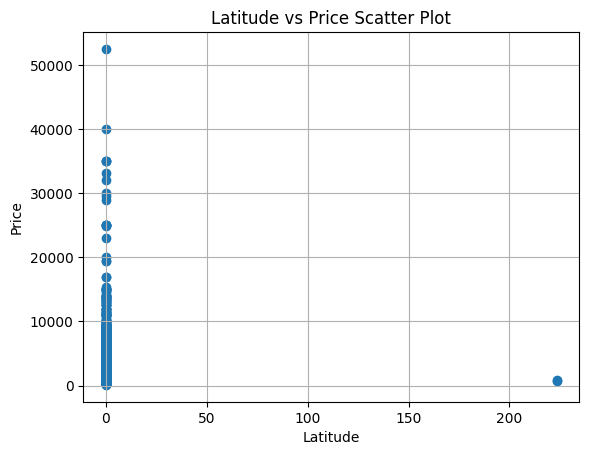

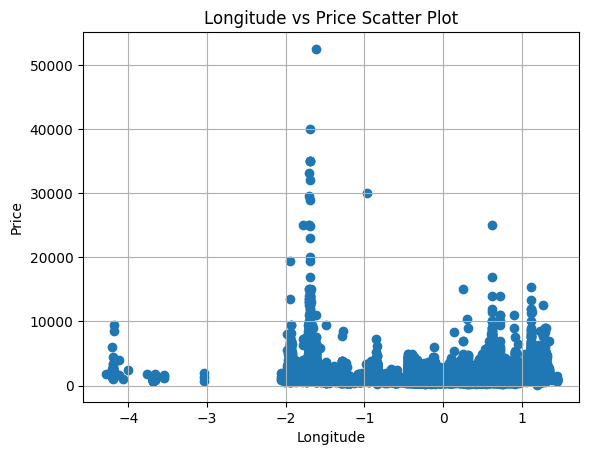

In [28]:
# X and y plot of photo, pets, lat, lon, fee and price

x4 = X_encoded_df['latitude']
x5 = X_encoded_df['longitude']
y = y_clean_imputed

plt.scatter(x4, y)
plt.title("Latitude vs Price Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Price")
plt.grid(True)
plt.show()

plt.scatter(x5, y)
plt.title("Longitude vs Price Scatter Plot")
plt.xlabel("Longitude")
plt.ylabel("Price")
plt.grid(True)
plt.show()

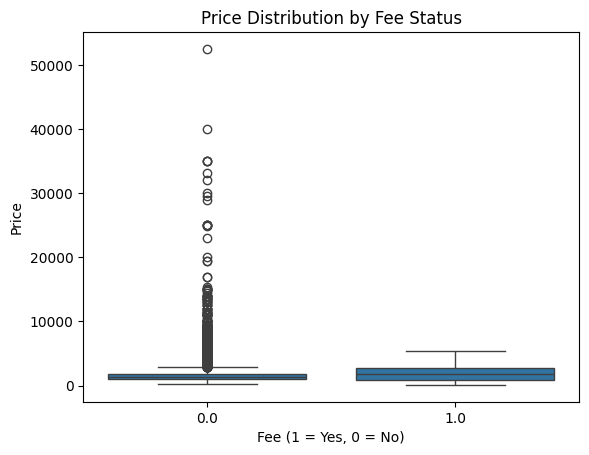

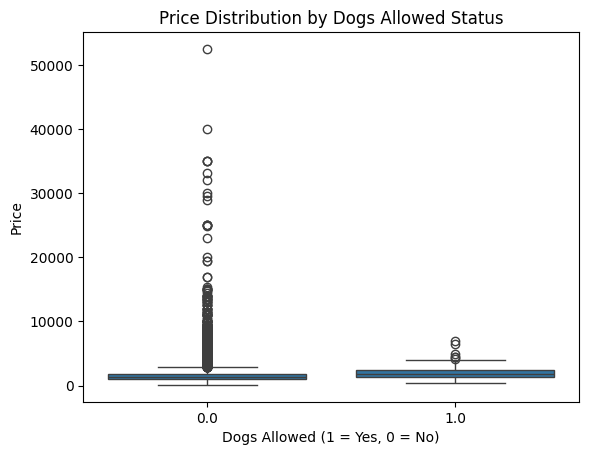

In [34]:
x6 = X_encoded_df['fee_Yes']

# X and y plot of fee and price
sns.boxplot(x=x6, y=y, data=X_encoded_df)
plt.xlabel('Fee (1 = Yes, 0 = No)')
plt.ylabel('Price')
plt.title('Price Distribution by Fee Status')
plt.show()

x7 = X_encoded_df['pets_allowed_Dogs']

# X and y plot of fee and price
sns.boxplot(x=x7, y=y, data=X_encoded_df)
plt.xlabel('Dogs Allowed (1 = Yes, 0 = No)')
plt.ylabel('Price')
plt.title('Price Distribution by Dogs Allowed Status')
plt.show()

In [36]:
# Significance Test

#fee status
from scipy.stats import ttest_ind

group1 = y[x6 == 1]
group0 = y[x6 == 0]

print("Group 1 mean:", group1.mean())
print("Group 0 mean:", group0.mean())

t_stat, p_val = ttest_ind(group1, group0)

if p_val < 0.05:
    print("The difference in means is statistically significant (reject H0)")
else:
    print("No statistically significant difference in means (fail to reject H0)")

print(p_val)

#dogs allowed

group1 = y[x7 == 1]
group0 = y[x7 == 0]

print("Group 1 mean:", group1.mean())
print("Group 0 mean:", group0.mean())

t_stat, p_val = ttest_ind(group1, group0)

if p_val < 0.05:
    print("The difference in means is statistically significant (reject H0)")
else:
    print("No statistically significant difference in means (fail to reject H0)")

print(p_val)

Group 1 mean: 1948.5720895522388
Group 0 mean: 1526.2739006408324
The difference in means is statistically significant (reject H0)
2.9006555087803885e-11
Group 1 mean: 2047.5669291338584
Group 0 mean: 1526.4613677332584
The difference in means is statistically significant (reject H0)
6.725037648126235e-11


In [ ]:
# Significance Test

#latitude (x4), longitude (x5)

group1 = y[x6 == 1]
group0 = y[x6 == 0]

print("Group 1 mean:", group1.mean())
print("Group 0 mean:", group0.mean())

t_stat, p_val = ttest_ind(group1, group0)

if p_val < 0.05:
    print("The difference in means is statistically significant (reject H0)")
else:
    print("No statistically significant difference in means (fail to reject H0)")

print(p_val)

#dogs allowed

group1 = y[x7 == 1]
group0 = y[x7 == 0]

print("Group 1 mean:", group1.mean())
print("Group 0 mean:", group0.mean())

t_stat, p_val = ttest_ind(group1, group0)

if p_val < 0.05:
    print("The difference in means is statistically significant (reject H0)")
else:
    print("No statistically significant difference in means (fail to reject H0)")

print(p_val)

In [22]:
df.describe()

bathrooms      bedrooms      latitude     longitude         price
count  99759.000000  99759.000000  9.975900e+04  99759.000000  99758.000000
mean       1.445303      1.728646  3.148802e+04    -91.559321   1527.126546
std        0.546939      0.748171  7.024157e+06     15.818322    899.300506
min        0.000000      0.000000  1.957380e+01   -159.369800    100.000000
25%        1.000000      1.000000  3.374960e+01   -104.791900   1015.000000
50%        1.000000      2.000000  3.722820e+01    -84.562300   1350.000000
75%        2.000000      2.000000  3.995390e+01    -77.585300   1795.000000
max        9.000000      9.000000  1.568782e+09    -68.778800  52500.000000

In [ ]:
df.describe(include='object')

fee has_photo pets_allowed  state
count   99759     99759        99759  99759
unique      4         5            5     52
top        No       Yes    Cats,Dogs     TX
freq    99556     56156        97781  11561

In [ ]:
stats.skew(df['bathrooms'])       # Skewness

np.float64(0.985013872716615)

Skew is 0.99 so bathroom has right skew

In [28]:
stats.kurtosis(df['bathrooms'])   # Kurtosis

np.float64(2.301362840092618)

Kurtosis is 2.3 so bathroom has light tails, flatter peak

In [29]:
stats.skew(y_clean_imputed)       # Skewness

np.float64(9.797993238505386)

Skew is 9.80 so price has right skew

In [30]:
stats.kurtosis(y_clean_imputed)   # Kurtosis

np.float64(303.4879411866604)

Kurtosis is 303.49 so price has extreme outliers and heavy tails

Since price is not Normally distributed, use IQR Method to remove outliers

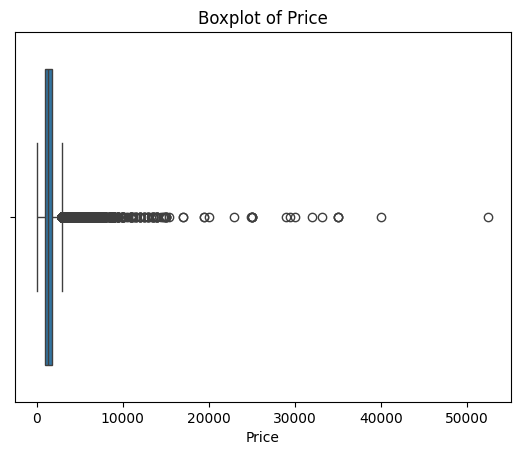

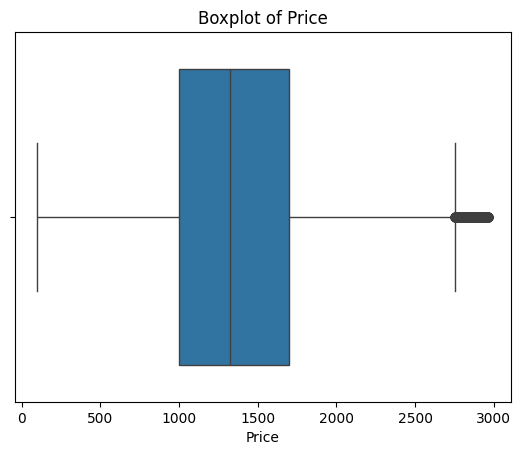

In [33]:
# Remove outliers
Q1 = y_clean_imputed.quantile(0.25)
Q3 = y_clean_imputed.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data
y_no_outliers = y_clean_imputed[(y_clean_imputed >= lower_bound) & (y_clean_imputed <= upper_bound)]

sns.boxplot(x=y_clean_imputed)
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

sns.boxplot(x=y_no_outliers)
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

In [ ]:
[df['bathrooms'] == 9]

bathrooms  bedrooms fee has_photo pets_allowed state  latitude  \
38776        9.0       6.0  No       Yes    Cats,Dogs    CA   34.1176   

       longitude    price  
38776  -118.3327  32000.0

C:\Users\mieme\AppData\Local\Temp\ipykernel_13704\736587052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_price_by_state_sorted, x='state', y='mean_price', palette='viridis')


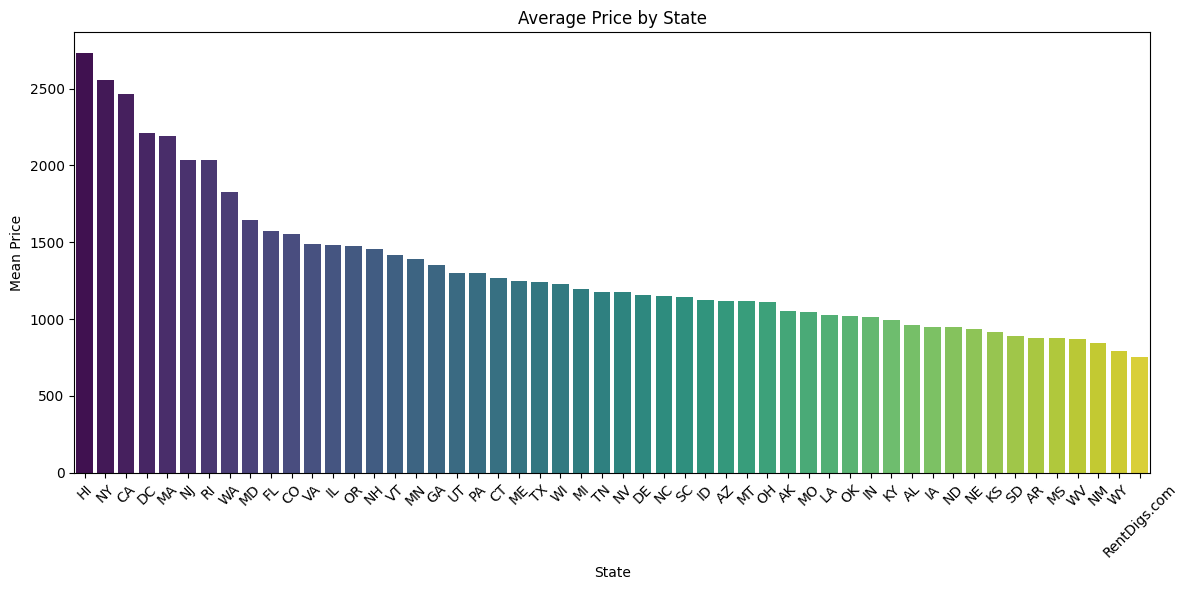

In [ ]:
mean_price_by_state = df.groupby('state')['price'].mean().reset_index() #using the original dataframe without removing any outliers
mean_price_by_state.columns = ['state', 'mean_price']
mean_price_by_state_sorted = mean_price_by_state.sort_values(by = 'mean_price', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_price_by_state_sorted, x='state', y='mean_price', palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Price by State')
plt.ylabel('Mean Price')
plt.xlabel('State')
plt.tight_layout()
plt.show()

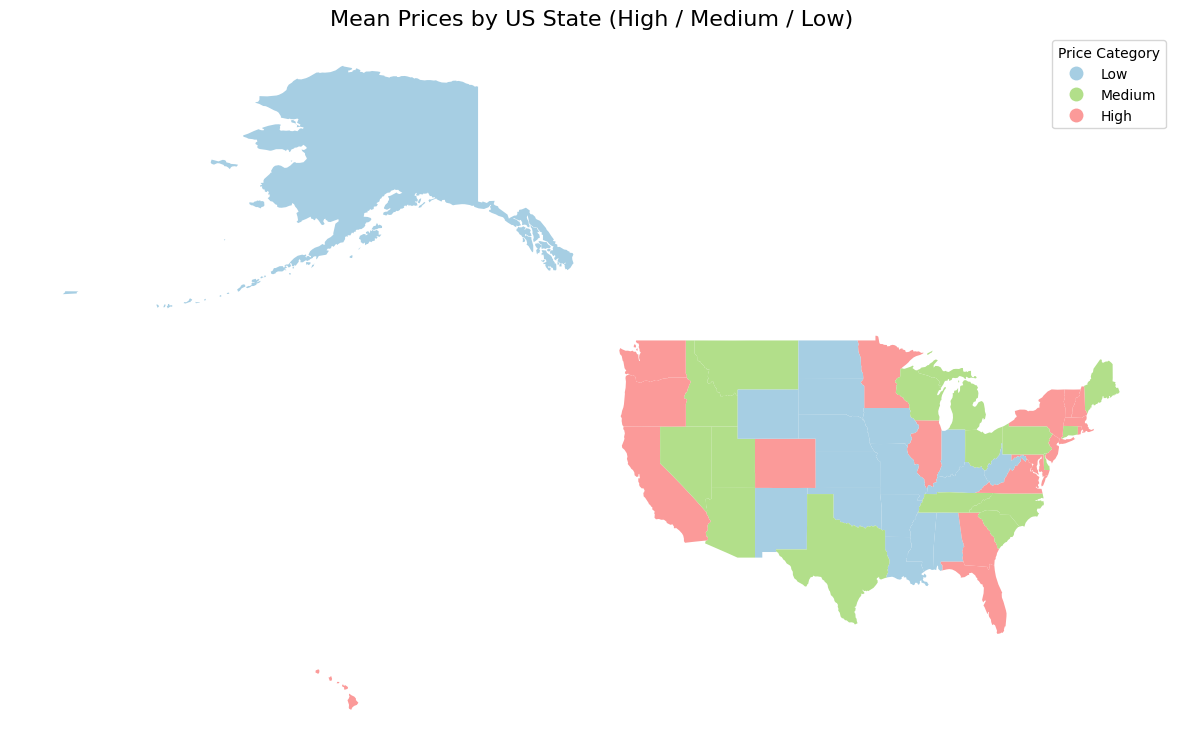

In [14]:
# show mean price per state on a map of US
mean_price_by_state['state'] = mean_price_by_state['state'].str.upper()

# Map abbreviations to full names
abbr_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee',
    'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}
mean_price_by_state['state_name'] = mean_price_by_state['state'].map(abbr_to_name)

# Categorize prices
mean_price_by_state['price_category'] = pd.qcut(mean_price_by_state['mean_price'], q=3, labels=['Low', 'Medium', 'High'])
import geopandas as gpd

# Use GeoJSON of US States
states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Ensure matching state names
mean_price_by_state['state'] = mean_price_by_state['state'].str.title()  # Adjust to match GeoJSON format if needed
merged = states.merge(mean_price_by_state, left_on='name', right_on='state_name', how='inner')

# Drop rows with no geometry (this avoids the error, but check why they’re missing)
merged = merged[merged['geometry'].notnull()]

# Optional: Fix invalid geometries if needed
merged['geometry'] = merged['geometry'].buffer(0)

import matplotlib.colors as mcolors

# Custom colormap for categories
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99'])

# Plot with only `column` and `cmap`
fig, ax = plt.subplots(figsize=(15, 10))
merged.plot(column='price_category',
            ax=ax,
            legend=True,
            legend_kwds={'title': 'Price Category'},
            cmap=cmap,
            categorical=True)
plt.title('Mean Prices by US State (High / Medium / Low)', fontsize=16)
plt.axis('off')
plt.show()

## Interactive Map of US

In [35]:
import plotly.express as px
import plotly.graph_objects as go

df = mean_price_by_state

# Merge to keep geometry and data together
merged = states.merge(df, left_on='name', right_on='state_name', how='left')

# Convert geometry to GeoJSON-like dict for Plotly
merged_json = merged.__geo_interface__

# Get centroids for labels
merged['centroid'] = merged.geometry.centroid
merged['lon'] = merged.centroid.x
merged['lat'] = merged.centroid.y
merged['state'] = merged['state'].str.upper()


# Create choropleth
fig = px.choropleth(
    merged,
    geojson=merged_json,
    locations='name',              # must match 'id' or 'feature id' in geojson
    featureidkey='properties.name', # path to state name in GeoJSON
    color='price_category',
    color_discrete_map={'Low': '#a6cee3', 'Medium': '#b2df8a', 'High': '#fb9a99', 'No Data': 'lightgray'},
    hover_name='name',
    hover_data={'mean_price': True, 'price_category': True},
    scope='usa'
)

# Add scattergeo trace for text labels
fig.add_trace(go.Scattergeo(
    lon=merged['lon'],
    lat=merged['lat'],
    text=merged['state'],
    mode='text',
    textfont=dict(size=9, color='black'),
    showlegend=False
))

fig.update_layout(legend_title_text="Mean Price Category")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='US States Mean Prices')
fig.show()

C:\Users\mieme\AppData\Local\Temp\ipykernel_13704\3457562423.py:13: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\mieme\AppData\Local\Temp\ipykernel_13704\3457562423.py:14: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\mieme\AppData\Local\Temp\ipykernel_13704\3457562423.py:15: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [16]:
mean_price_by_state.head()

state   mean_price price_category  state_name state_abbrev
0    Ak  1054.280702            Low      Alaska          NaN
1    Al   959.802260            Low     Alabama          NaN
2    Ar   874.367893            Low    Arkansas          NaN
3    Az  1119.404702         Medium     Arizona          NaN
4    Ca  2461.169859           High  California          NaN

In [33]:
mean_price_by_state.sort_values(by = 'mean_price', ascending=False).head()

state   mean_price
11    HI  2729.193548
34    NY  2553.013720
4     CA  2461.169859
7     DC  2208.223529
19    MA  2192.051577

Heatmaps

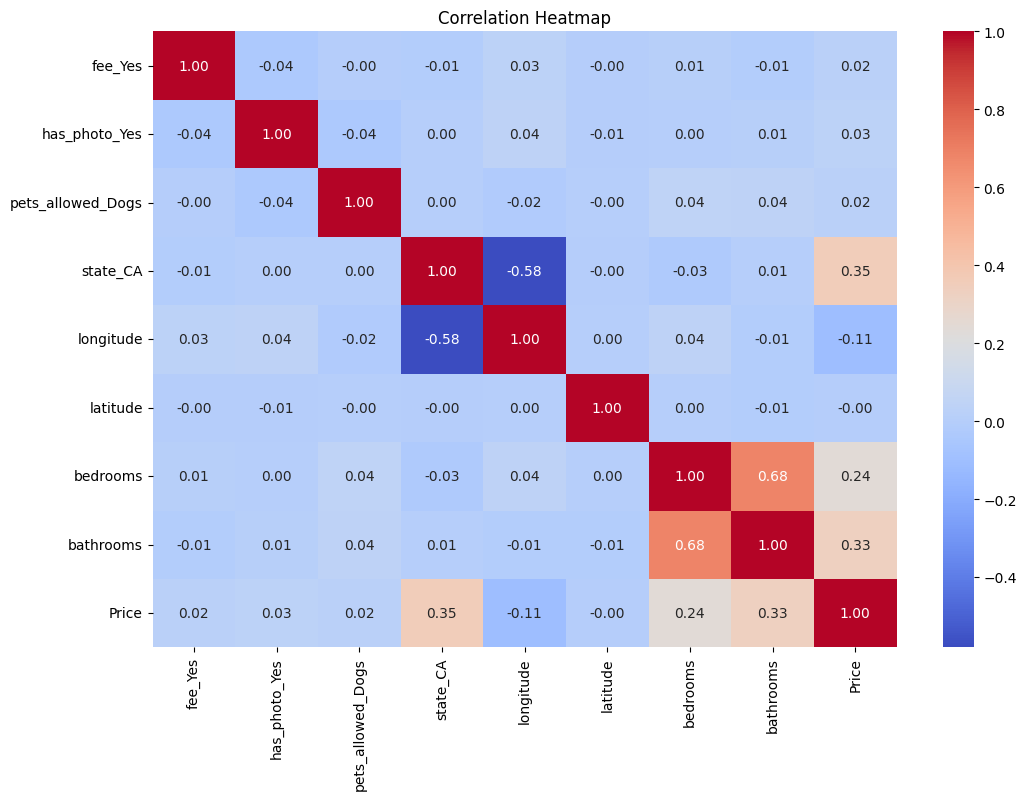

In [ ]:
selected_columns = [
    'fee_Yes',
    'has_photo_Yes',
    'pets_allowed_Dogs',
    'state_CA',
    'longitude',
    'latitude',
    'bedrooms',
    'bathrooms'
]

# with Price (didn't filter out outliers)
df_combined = pd.concat([X_encoded_df[selected_columns], y_clean_imputed.rename("Price")], axis=1)
corr_matrix = df_combined.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

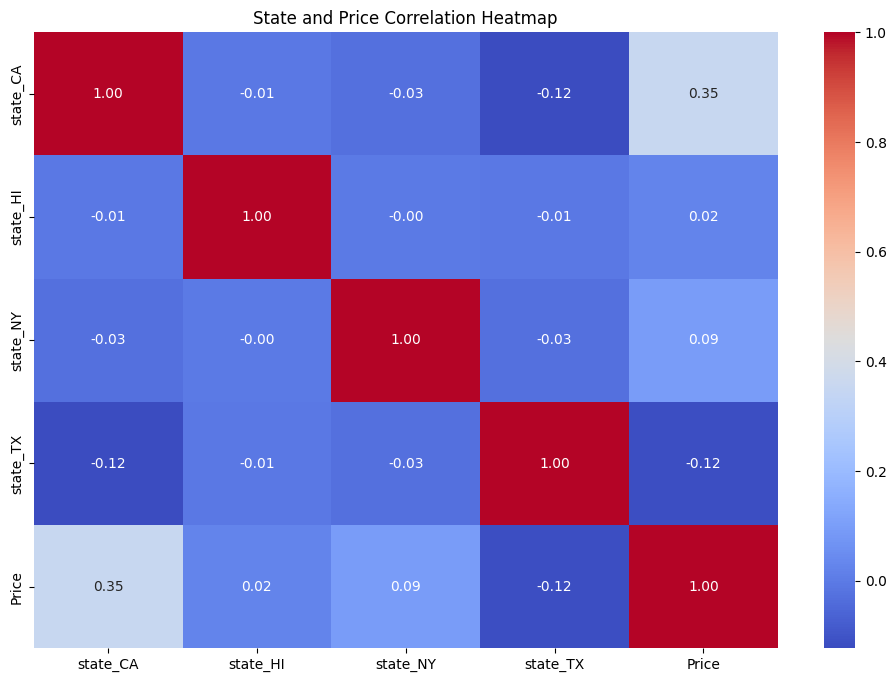

In [11]:
selected_columns = [
    'state_CA',
    'state_HI',
    'state_NY',
    'state_TX'
]

# with Price (didn't filter out outliers)
df_combined = pd.concat([X_encoded_df[selected_columns], y_clean_imputed.rename("Price")], axis=1)
corr_matrix = df_combined.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("State and Price Correlation Heatmap")
plt.show()

## Regression

Analyze the data using the methods we have talked about in class,
such as linear regression, kernel regression, univariate kernel density estimation, 
2-d kernel density estimation, classification, quantile plots, or gam.  
You can do regression and also analyze each variable individually. 

This data's output variable is numeric. Let's first use methods that are made for numeric data: linear regression, kernel regression, kernel density estimations, quantile plots, gam.

In [12]:
df.shape  

(99759, 9)

In [11]:
X_encoded_df.shape

(99759, 70)

In [14]:
X_clean.shape

(95052, 70)

In [13]:
X_sub.shape

(5000, 4)

## Using entire X_encoded_df (70 variables)

Linear Regression (all)

In [12]:
# Linear Regression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y_clean_imputed, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Optional: You can print the coefficients of the model to interpret the feature importance
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Root Mean Squared Error: 2964634104011.9727
R-squared: -1.1163144253685375e+19
Coefficients: [ 3.08654596e+02  2.05498232e+01  2.27232607e+08  1.88592399e+02
  3.62385349e+14  3.21697505e+14 -2.77050337e+14 -2.77050337e+14
  7.97771238e+13  1.20464969e+14 -2.11114185e+13 -2.11114185e+13
 -2.11114185e+13  4.00821806e+14  4.00821806e+14 -1.80737543e+13
  4.00821806e+14  2.36035702e+14  8.10306085e+14  8.10306085e+14
  8.10306085e+14  8.10306085e+14  8.10306085e+14  8.10306085e+14
  8.10306085e+14  8.10306085e+14  8.10306085e+14  8.10306085e+14
  8.10306085e+14  8.10306085e+14  8.10306085e+14  8.10306085e+14
  8.10306085e+14  8.10306085e+14  8.10306085e+14  8.10306085e+14
  8.10306085e+14  8.10306085e+14  8.10306085e+14  8.10306085e+14
  8.10306085e+14  8.10306085e+14  8.10306085e+14  8.10306085e+14
  8.10306085e+14  8.10306085e+14  8.10306085e+14  8.10306085e+14
  8.10306085e+14  8.10306085e+14  8.10306085e+14  8.10306085e+14
  8.10306085e+14  8.10306085e+14  8.10306085e+14  8.10306085e+

Diagnose Model:

In [ ]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant for intercept in VIF calculation
X_with_const = add_constant(X_encoded_df)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

vif_sorted = vif[vif["Features"] != "const"].sort_values(by="VIF", ascending=False)
print(vif_sorted)

c:\Users\mieme\Downloads\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\mieme\Downloads\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       Features           VIF
13                 bedrooms_9.0           inf
15                     fee_2150           inf
14                     fee_1380           inf
25  pets_allowed_Cats,Dogs,None           inf
27         pets_allowed_Monthly           inf
18               has_photo_1380           inf
19               has_photo_2150           inf
68           state_RentDigs.com           inf
79                     state_WY  1.125900e+15
70                     state_SD  3.602880e+14
36                     state_DE  2.251800e+14
30                     state_AR  2.235037e+13
28                     state_AK  1.145954e+13
54                     state_MT  9.952706e+12
40                     state_IA  7.594603e+12
53                     state_MS  5.822365e+12
49                     state_ME  5.445707e+12
78                     state_WV  4.487892e+12
62                     state_NY  4.187447e+12
26            pets_allowed_Dogs  2.359141e+12
17                      fee_Yes  2

If VIF values are over 5 or 10, try removing highly correlated features or combine them.

Try to study each feature individually (univariate analysis), but this may ignore the interactions between variables.

In [67]:
# Now run the regression for each feature
results = {}

for col in X_encoded_df.columns:
    x_i = sm.add_constant(X_encoded_df[[col]])  # Shape should be (n_samples, 2)
    model = sm.OLS(y_clean_imputed, x_i).fit()

    results[col] = {
        'intercept': np.float64(model.params.get('const', np.nan)),
        'coefficient': np.float64(model.params.get(col, np.nan)),
        'r_squared': np.float64(model.rsquared)
    }

# Compile results into a DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='r_squared', ascending=False)

# Change the max columns display setting to None to display all columns
pd.set_option('display.max_columns', None)
# Change the max columns display setting to None to display all columns
pd.set_option('display.max_rows', None)
# Display top results
print(results_df)

                               intercept   coefficient  r_squared
state_CA                     1418.968810   1044.803939   0.124146
bathrooms                    1527.201392    296.583582   0.107728
state_MA                     1491.841946    700.209631   0.028791
bedrooms_1.0                 1650.052905   -303.008233   0.027106
bedrooms_6.0                 1524.136122   6510.438346   0.024429
state_NJ                     1503.131860    534.298649   0.015041
bedrooms_5.0                 1521.461055   2003.598385   0.014045
state_TX                     1564.963600   -325.415430   0.013303
bedrooms_4.0                 1514.587175    839.476158   0.012774
state_NC                     1552.446111   -399.501279   0.011571
longitude                    1527.201392    -96.325757   0.011364
state_OH                     1548.759298   -438.203606   0.011000
bedrooms_3.0                 1495.816049    295.877028   0.010167
state_NY                     1520.367485   1035.197007   0.008607
bedrooms_7

In [ ]:
# Standardize the features

# Apply StandardScaler to all numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded_df)

In [ ]:
# Inspect for outliers or data issues:

# Calculate z-scores for each feature
z_scores = np.abs((X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0))
print(f"Outliers detected in features: {np.where(z_scores > 3)}")  # Flag rows with z-scores > 3

In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge

# Ridge regression with alpha=1.0 (you can experiment with the alpha parameter)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_scaled, y_clean_imputed)

print("Ridge Coefficients:", ridge_model.coef_)
print("Ridge Intercept:", ridge_model.intercept_)

In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso

# Lasso regression with alpha=0.1 (you can experiment with the alpha parameter)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_scaled, y_clean_imputed)

print("Lasso Coefficients:", lasso_model.coef_)
print("Lasso Intercept:", lasso_model.intercept_)

Check for MSE and R-squared again

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict with your model
y_pred = ridge_model.predict(X_scaled)  # or lasso_model.predict(X_scaled)

# Calculate MSE and R-squared
mse = mean_squared_error(y_clean_imputed, y_pred)
r2 = r2_score(y_clean_imputed, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

## Regression models with X_encoded_df 70 variables

Train and Test split/Setup

In [13]:
# Train-test split (no stratify for regression)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_df, y_clean_imputed, test_size=0.2, random_state=42
)

Random Forest Regressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) #100 decision trees
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("RandomForestRegressor:")
print("Root MSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf, squared=False)))
print("R²:", r2_score(y_test, y_pred_rf))

RandomForestRegressor:
Root MSE: 22.837283030238652
R²: 0.6545206661716265


c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost Regressor

In [15]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBRegressor:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb, squared=False)))
print("R²:", r2_score(y_test, y_pred_xgb))

XGBRegressor:
RMSE: 23.24858740506095
R²: 0.6289515542735222


c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor

In [16]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

# Evaluation
print("GradientBoostingRegressor:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr, squared=False)))
print("R²:", r2_score(y_test, y_pred_gbr))

GradientBoostingRegressor:
RMSE: 24.97111638231521
R²: 0.5061487340239808


c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Multivariate Linear Regression

In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

# Evaluation
print("Multivariate Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr, squared=False)))
print("R²:", r2_score(y_test, y_pred_lr))

Multivariate Linear Regression:
RMSE: 1721811.2858301203
R²: -1.1163144253685375e+19


c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Feature Importance for tree models

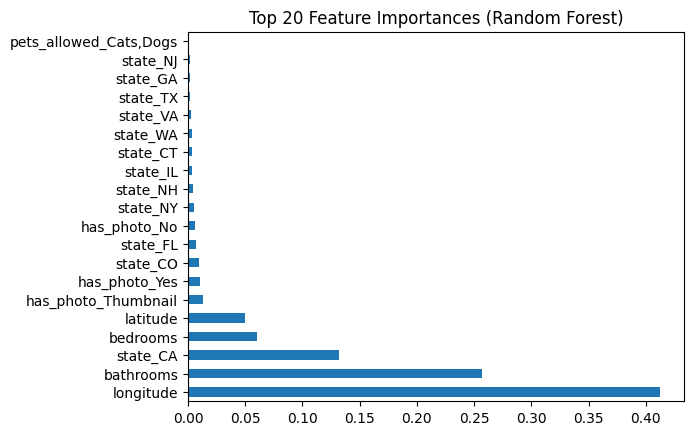

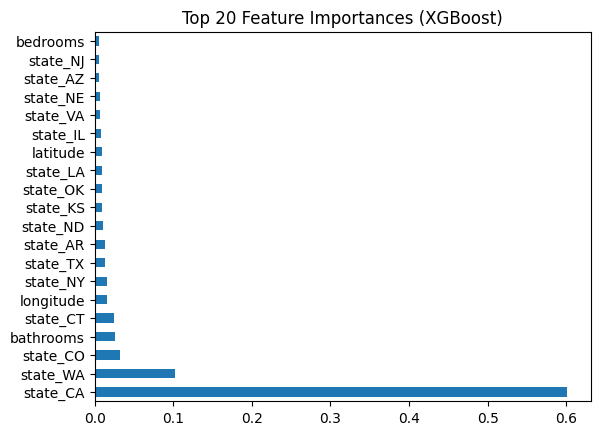

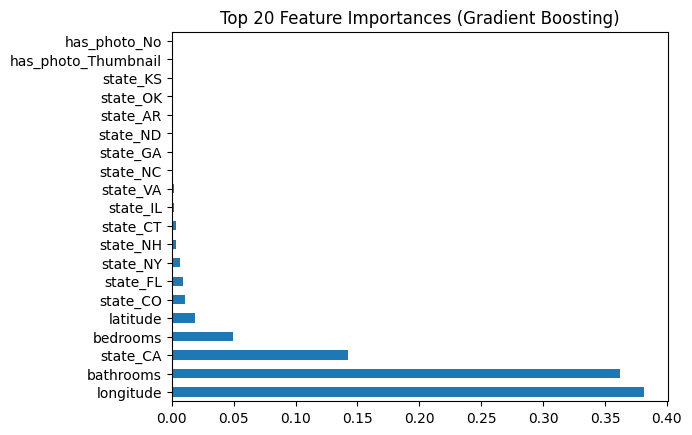

In [28]:
# Random Forest
importances = rf_model.feature_importances_
features = X_encoded_df.columns

pd.Series(importances, index=features).sort_values(ascending=False).head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()

# XGBoost
importances = xgb_model.feature_importances_
features = X_encoded_df.columns

pd.Series(importances, index=features).sort_values(ascending=False).head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (XGBoost)")
plt.show()

# Gradient Boost
importances = gbr_model.feature_importances_
features = X_encoded_df.columns

pd.Series(importances, index=features).sort_values(ascending=False).head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Gradient Boosting)")
plt.show()

Evaluate all three models

In [19]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")
    return y_pred
y_pred_rf = evaluate(rf, X_test, y_test, "Random Forest")
y_pred_xgb = evaluate(xgb, X_test, y_test, "XGBoost")
y_pred_gbr = evaluate(gbr, X_test, y_test, "Gradient Boosting")


Random Forest
RMSE: 22.84
R²: 0.6545

XGBoost
RMSE: 23.25
R²: 0.6290

Gradient Boosting
RMSE: 24.97
R²: 0.5061


c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    feature_names = X.columns
    fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]
    fi.plot(kind='barh', figsize=(10, 6))
    plt.title(f"Top 20 Features - {model_name}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf, "Random Forest")
plot_feature_importance(xgb, "XGBoost")
plot_feature_importance(gbr, "Gradient Boosting")


ValueError: Length of values (70) does not match length of index (21)

Cross Validation

In [21]:
def cross_val_rmse(model, name):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name} CV RMSE: {-scores.mean():.2f} ± {scores.std():.2f}")

cross_val_rmse(rf, "Random Forest")
cross_val_rmse(xgb, "XGBoost")
cross_val_rmse(gbr, "Gradient Boosting")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ~~~~~~~~~~~~~~~~~~~^
        X,
        ^^
    ...<4 lines>...
        force_all_finite=False,
        ^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\mieme\Downloads\venv\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\mieme\Downloads\venv\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'housing/rent/apartment'


Hyperparameter tuning

In [22]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf,
                       cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("\nBest params (Random Forest):", grid_rf.best_params_)
evaluate(grid_rf.best_estimator_, X_test, y_test, "Tuned Random Forest")


Fitting 3 folds for each of 12 candidates, totalling 36 fits


KeyboardInterrupt: 

Residual Plot

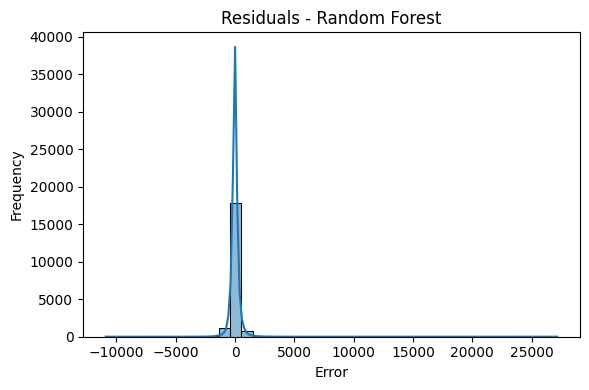

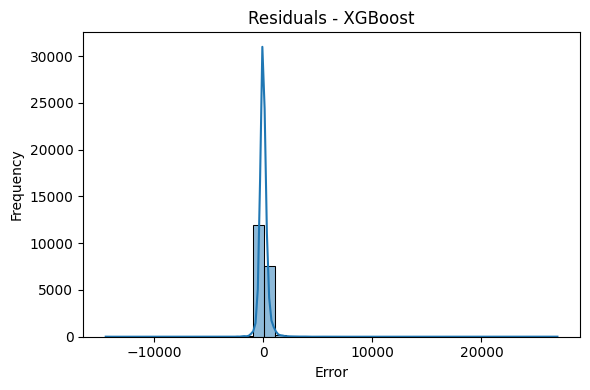

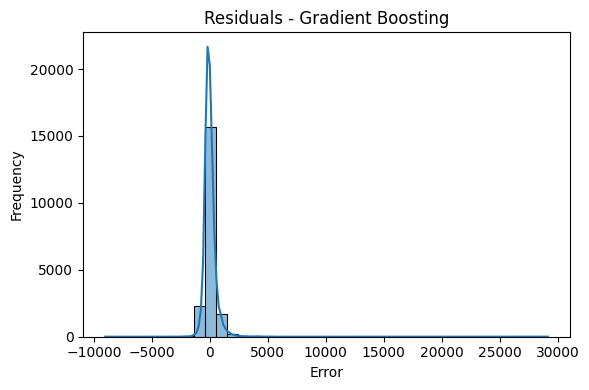

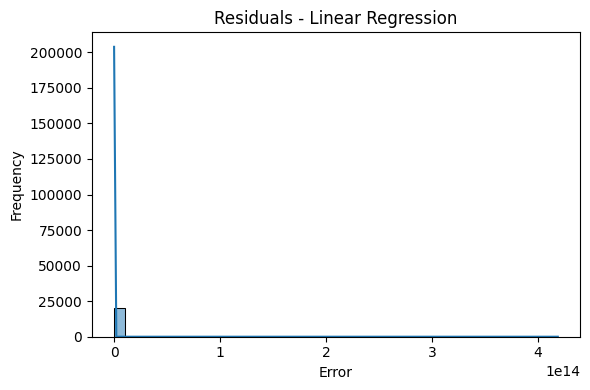

In [26]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, bins=40, kde=True)
    plt.title(f"Residuals - {model_name}")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_residuals(y_test, y_pred_rf, "Random Forest")
plot_residuals(y_test, y_pred_xgb, "XGBoost")
plot_residuals(y_test, y_pred_gbr, "Gradient Boosting")
plot_residuals(y_test, y_pred_lr, "Linear Regression")


## Select variables from encoded X dataframe

just selected variables: fee_Yes, has_photo_Yes, pets_allowed_Dogs, state_CA, longitude, latitude, bedrooms, bathrooms

## All Regression Models!

In [16]:
# Select the meaningful columns
selected_columns = [
    'fee_Yes',
    'has_photo_Yes',
    'pets_allowed_Dogs',
    'state_CA',
    'longitude',
    'latitude',
    'bedrooms',
    'bathrooms'
]

X_encoded_df[selected_columns].shape

(99759, 8)


==== Linear Regression ====
RMSE: 773.02
R²: 0.24


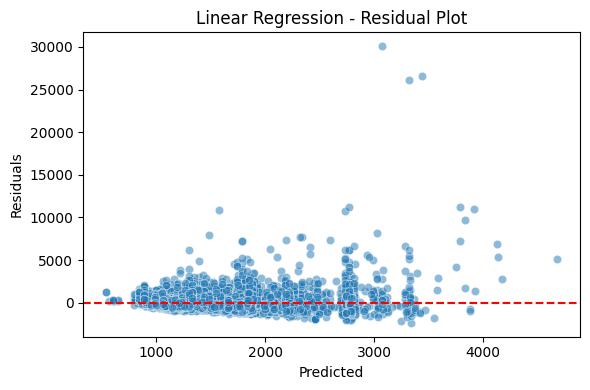


==== Random Forest ====
RMSE: 526.70
R²: 0.65


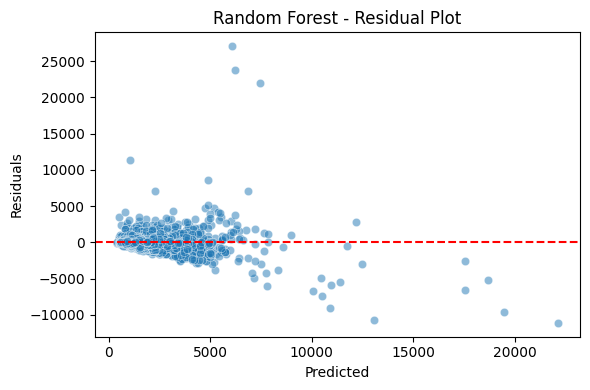

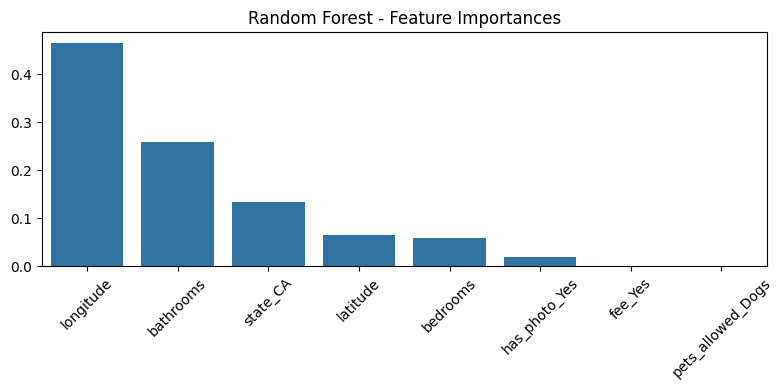


==== XGBoost ====
RMSE: 541.17
R²: 0.63


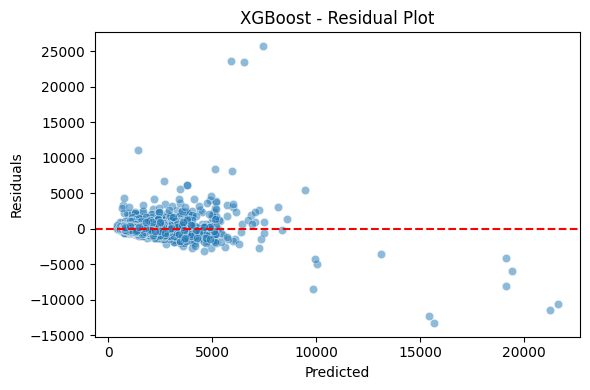

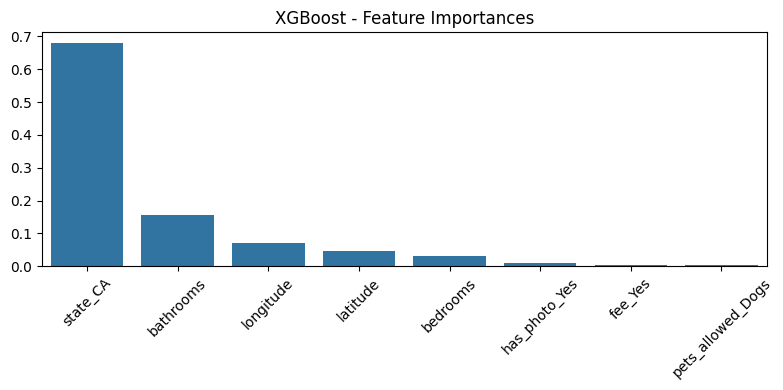


==== Gradient Boosting ====
RMSE: 626.09
R²: 0.50


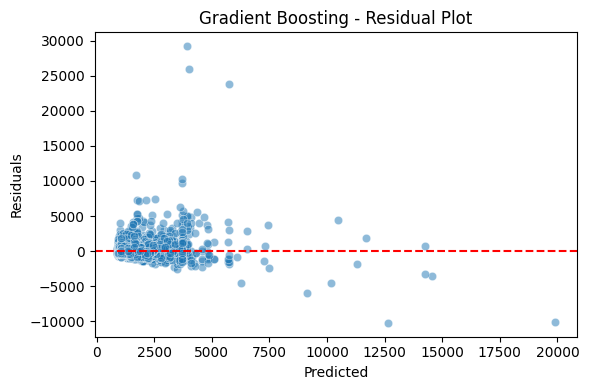

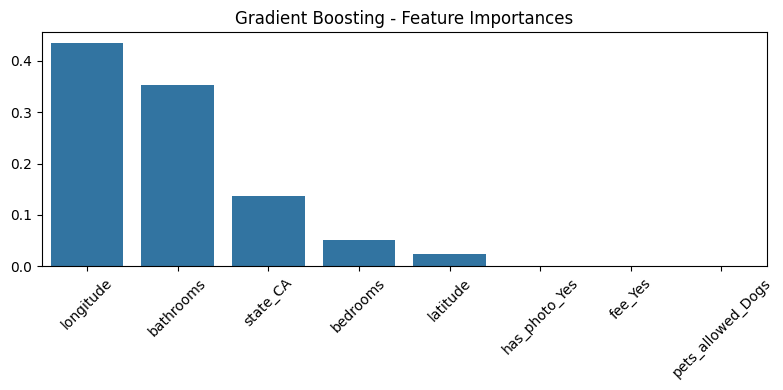

In [ ]:
# Select the meaningful columns
selected_columns = [
    'fee_Yes',
    'has_photo_Yes',
    'pets_allowed_Dogs',
    'state_CA',
    'longitude',
    'latitude',
    'bedrooms',
    'bathrooms'
]

# Prepare X and y
X = X_encoded_df[selected_columns]
y = y_clean_imputed

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Fit models, predict, evaluate, and plot residuals
for name, model in models.items():
    print(f"\n==== {name} ====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    
    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"{name} - Residual Plot")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.tight_layout()
    plt.show()
    
    # Plot feature importance (tree-based models only)
    if name != 'Linear Regression':
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            plt.figure(figsize=(8, 4))
            sns.barplot(x=[selected_columns[i] for i in indices], y=importances[indices])
            plt.xticks(rotation=45)
            plt.title(f"{name} - Feature Importances")
            plt.tight_layout()
            plt.show()


## Now with just the four numeric variables


==== Linear Regression ====
RMSE: 836.91
R²: 0.11


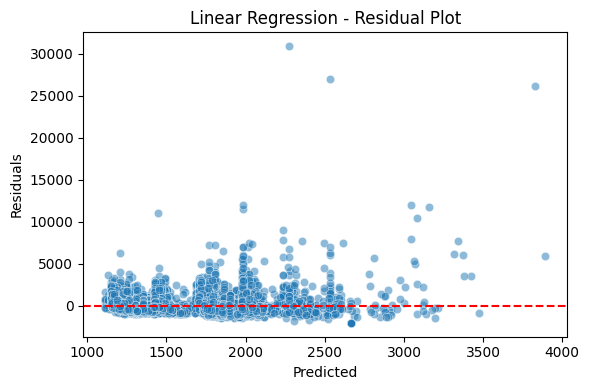


==== Random Forest ====
RMSE: 524.62
R²: 0.65


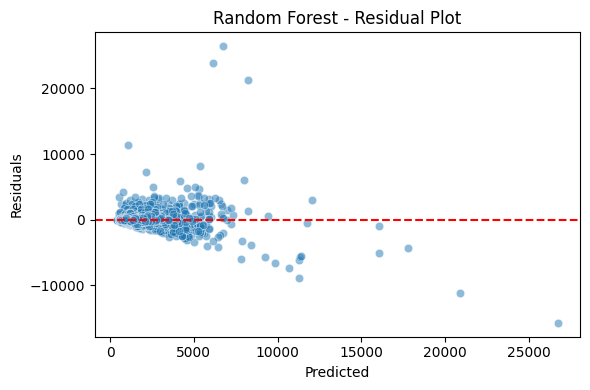

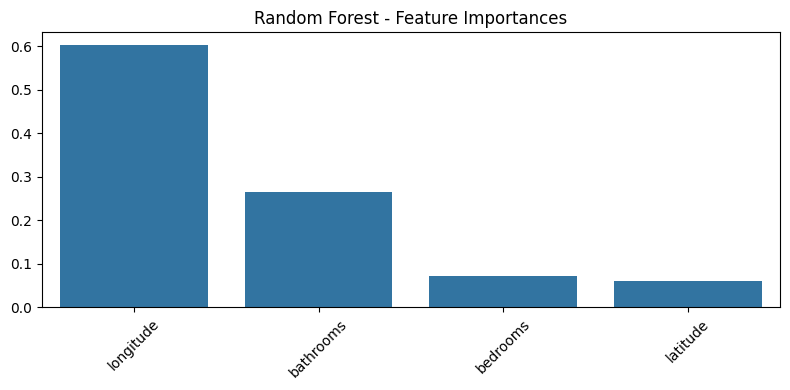


==== XGBoost ====
RMSE: 539.72
R²: 0.63


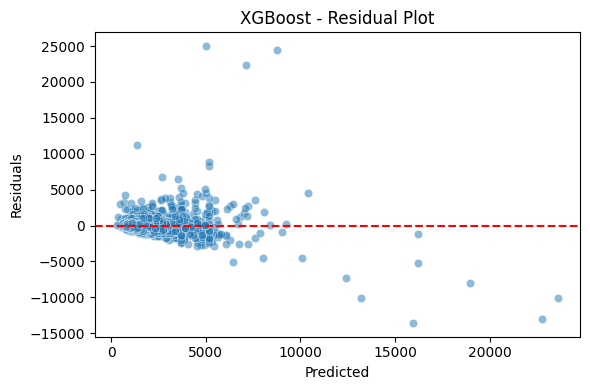

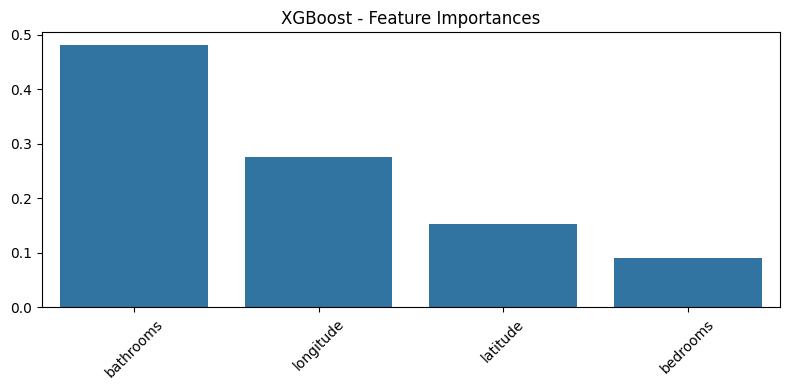


==== Gradient Boosting ====
RMSE: 623.99
R²: 0.51


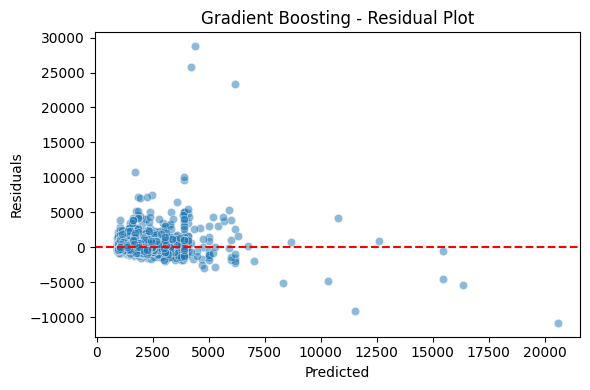

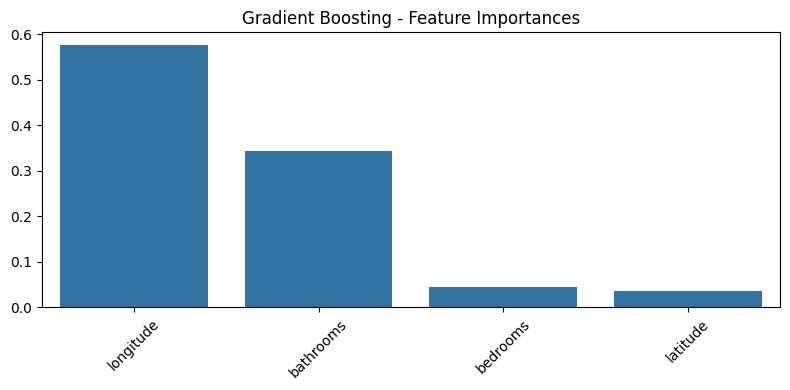

In [81]:
# Select
selected_columns = [
    'longitude',
    'latitude',
    'bedrooms',
    'bathrooms'
]

# Prepare X and y
X = X_encoded_df[selected_columns]
y = y_clean_imputed

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Fit models, predict, evaluate, and plot residuals
for name, model in models.items():
    print(f"\n==== {name} ====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    
    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"{name} - Residual Plot")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.tight_layout()
    plt.show()
    
    # Plot feature importance (tree-based models only)
    if name != 'Linear Regression':
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            plt.figure(figsize=(8, 4))
            sns.barplot(x=[selected_columns[i] for i in indices], y=importances[indices])
            plt.xticks(rotation=45)
            plt.title(f"{name} - Feature Importances")
            plt.tight_layout()
            plt.show()


## All models with price with no outliers!

## How to sync X to match y (that has no outliers)

In [10]:
# first, sync X to match the new y
# Calculate IQR on y
Q1 = y_clean_imputed.quantile(0.25)
Q3 = y_clean_imputed.quantile(0.75)
IQR = Q3 - Q1

# Filter data
mask = (y_clean_imputed >= Q1 - 1.5 * IQR) & (y_clean_imputed <= Q3 + 1.5 * IQR)

X_clean = X_encoded_df[mask].reset_index(drop=True)
y_clean = y_clean_imputed[mask].reset_index(drop=True)

4 numeric: Regression Models, no price outliers


==== Linear Regression ====
RMSE: 507.11
R²: 0.08


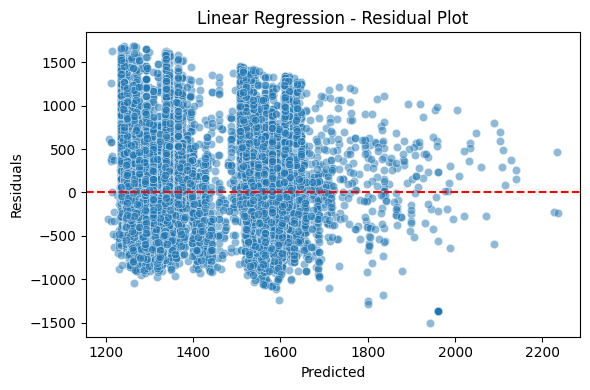


==== Random Forest ====
RMSE: 252.92
R²: 0.77


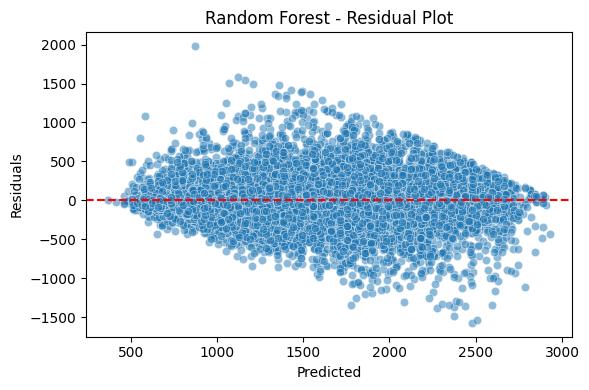

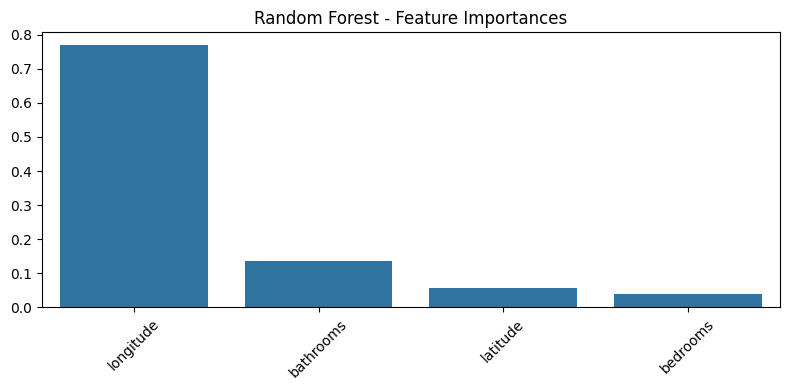


==== XGBoost ====
RMSE: 269.36
R²: 0.74


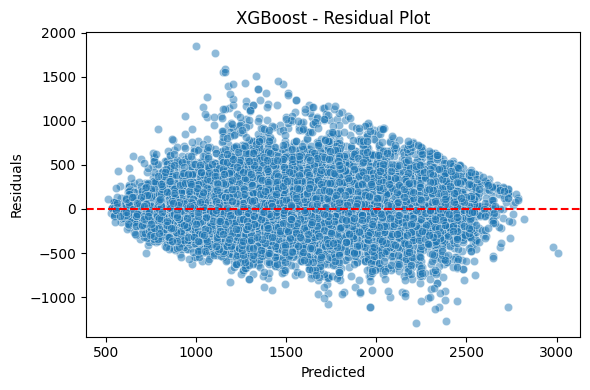

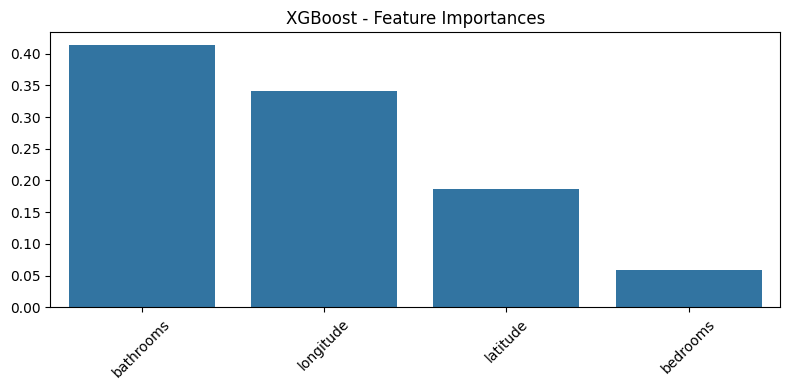


==== Gradient Boosting ====
RMSE: 357.70
R²: 0.54


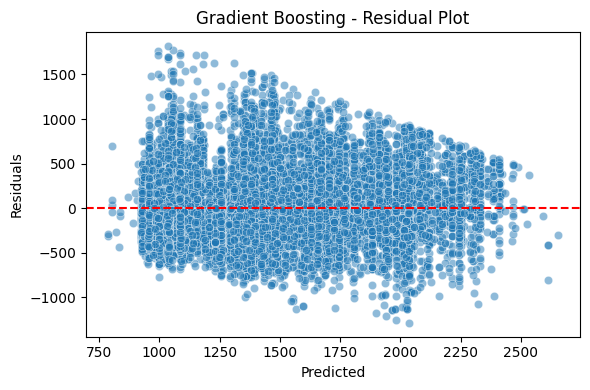

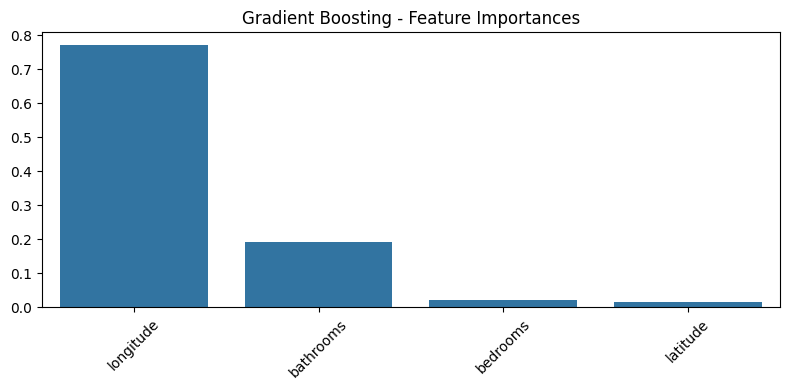

In [36]:
# Select
selected_columns = [
    'longitude',
    'latitude',
    'bedrooms',
    'bathrooms'
]

# Prepare X and y
X = X_clean[selected_columns]
y = y_clean

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Fit models, predict, evaluate, and plot residuals
for name, model in models.items():
    print(f"\n==== {name} ====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    
    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"{name} - Residual Plot")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.tight_layout()
    plt.show()
    
    # Plot feature importance (tree-based models only)
    if name != 'Linear Regression':
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            plt.figure(figsize=(8, 4))
            sns.barplot(x=[selected_columns[i] for i in indices], y=importances[indices])
            plt.xticks(rotation=45)
            plt.title(f"{name} - Feature Importances")
            plt.tight_layout()
            plt.show()

with all 8 variables: Regression Models, no price outliers


==== Linear Regression ====
RMSE: 469.14
R²: 0.21


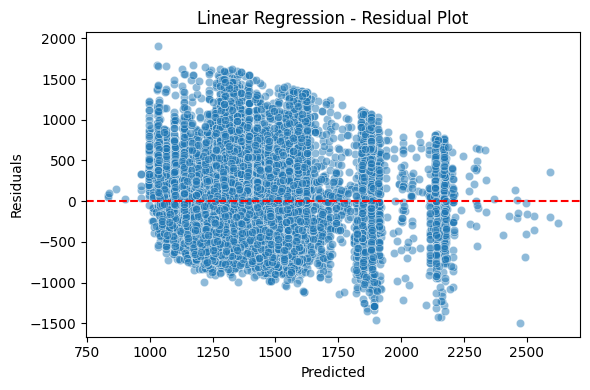


==== Random Forest ====
RMSE: 255.33
R²: 0.77


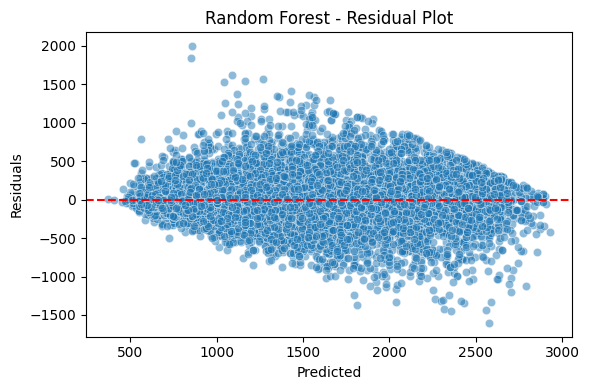

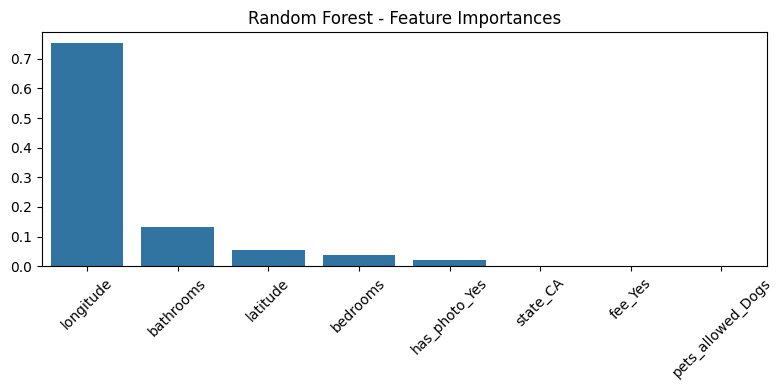


==== XGBoost ====
RMSE: 268.83
R²: 0.74


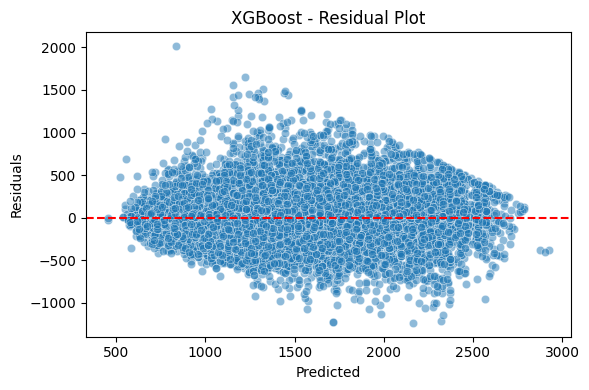

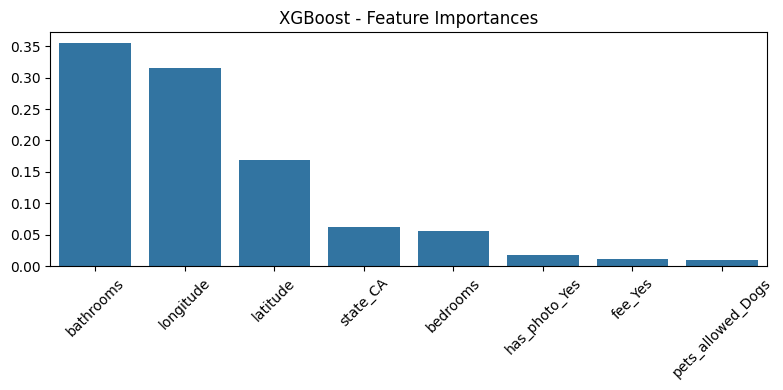


==== Gradient Boosting ====
RMSE: 357.01
R²: 0.54


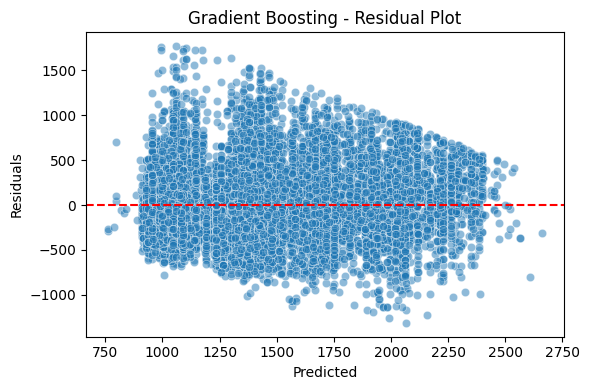

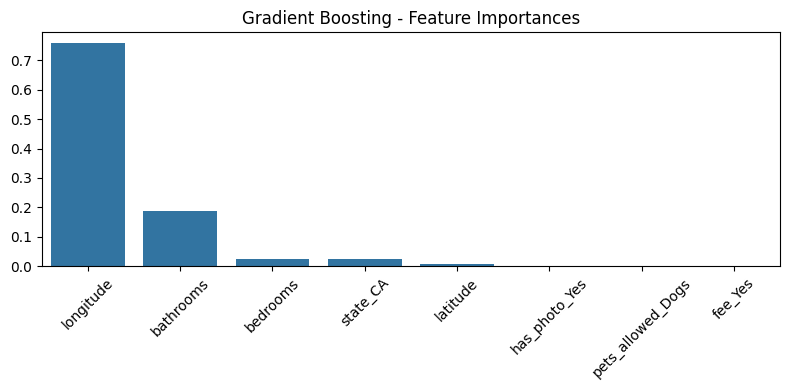

In [37]:
# Select the meaningful columns
selected_columns = [
    'fee_Yes',
    'has_photo_Yes',
    'pets_allowed_Dogs',
    'state_CA',
    'longitude',
    'latitude',
    'bedrooms',
    'bathrooms'
]

# Prepare X and y
X = X_clean[selected_columns]
y = y_clean

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Fit models, predict, evaluate, and plot residuals
for name, model in models.items():
    print(f"\n==== {name} ====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    
    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"{name} - Residual Plot")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.tight_layout()
    plt.show()
    
    # Plot feature importance (tree-based models only)
    if name != 'Linear Regression':
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            plt.figure(figsize=(8, 4))
            sns.barplot(x=[selected_columns[i] for i in indices], y=importances[indices])
            plt.xticks(rotation=45)
            plt.title(f"{name} - Feature Importances")
            plt.tight_layout()
            plt.show()


## Use C Function for the four GAM  Models

Just numeric for outlier price included

In [10]:
# --- Parameters ---
selected_columns = ['longitude', 'latitude', 'bathrooms', 'bedrooms']
X_sub = X_encoded_df[selected_columns].iloc[:5000].copy()
y_sub = y_clean_imputed.iloc[:5000].copy()
num_rows = len(X_sub)
num_grid = num_rows  # full smoothing
X_np = X_sub.to_numpy()
y_np = y_sub.to_numpy()

# --- Step 1: Longitude
X_lon = X_sub[['longitude']]
bandwidth_lon = KernelReg(y_np, X_lon.to_numpy(), var_type='c').bw[0]
fitted_lon = run_kernel_regression_c(X_lon, y_sub, num_rows, num_grid, bandwidth=bandwidth_lon)
resid1 = y_sub - np.array(fitted_lon)

# --- Step 2: Latitude
X_lat = X_sub[['latitude']]
bandwidth_lat = KernelReg(resid1, X_lat.to_numpy(), var_type='c').bw[0]
fitted_lat = run_kernel_regression_c(X_lat, resid1, num_rows, num_grid, bandwidth=bandwidth_lat)
resid2 = resid1 - np.array(fitted_lat)

# --- Step 3: Bathrooms
X_bath = X_sub[['bathrooms']]
bandwidth_bath = KernelReg(resid2, X_bath.to_numpy(), var_type='c').bw[0]
fitted_bath = run_kernel_regression_c(X_bath, resid2, num_rows, num_grid, bandwidth=bandwidth_bath)
resid3 = resid2 - np.array(fitted_bath)

# --- Step 4: Bedrooms
X_bed = X_sub[['bedrooms']]
bandwidth_bed = KernelReg(resid3, X_bed.to_numpy(), var_type='c').bw[0]
fitted_bed = run_kernel_regression_c(X_bed, resid3, num_rows, num_grid, bandwidth=bandwidth_bed)
resid_final = resid3 - np.array(fitted_bed)

# --- Final metrics
rmse = np.sqrt(np.mean(resid_final ** 2))
r2 = 1 - np.sum(resid_final ** 2) / np.sum((y_sub - y_sub.mean()) ** 2)

print(f"Bandwidths: lon={bandwidth_lon:.3f}, lat={bandwidth_lat:.3f}, bath={bandwidth_bath:.3f}, bed={bandwidth_bed:.3f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Bandwidths: lon=-0.008, lat=0.000, bath=0.308, bed=0.284
RMSE: 577.5445
R-squared: 0.6477


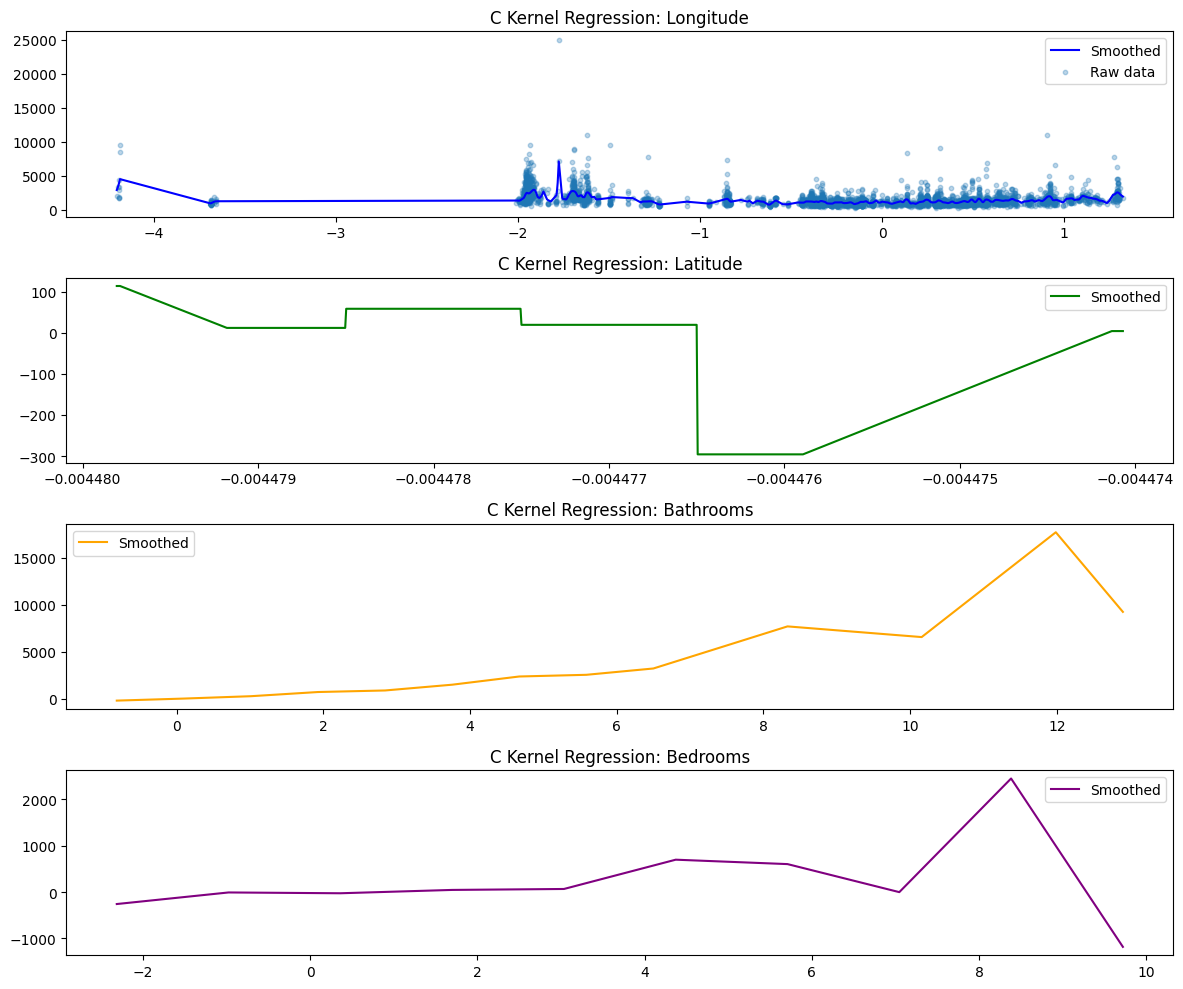

In [11]:
# graphs

# Convert to numpy arrays for plotting
lon_vals = X_lon['longitude'].to_numpy()
lat_vals = X_lat['latitude'].to_numpy()
bath_vals = X_bath['bathrooms'].to_numpy()
bed_vals = X_bed['bedrooms'].to_numpy()

# Sort values for smooth line plots
lon_sorted_idx = np.argsort(lon_vals)
lat_sorted_idx = np.argsort(lat_vals)
bath_sorted_idx = np.argsort(bath_vals)
bed_sorted_idx = np.argsort(bed_vals)

plt.figure(figsize=(12, 10))

# Longitude
plt.subplot(4, 1, 1)
plt.plot(lon_vals[lon_sorted_idx], np.array(fitted_lon)[lon_sorted_idx], color='blue', label='Smoothed')
plt.scatter(lon_vals, y_sub, s=10, alpha=0.3, label='Raw data')
plt.title('C Kernel Regression: Longitude')
plt.legend()

# Latitude
plt.subplot(4, 1, 2)
plt.plot(lat_vals[lat_sorted_idx], np.array(fitted_lat)[lat_sorted_idx], color='green', label='Smoothed')
plt.title('C Kernel Regression: Latitude')
plt.legend()

# Bathrooms
plt.subplot(4, 1, 3)
plt.plot(bath_vals[bath_sorted_idx], np.array(fitted_bath)[bath_sorted_idx], color='orange', label='Smoothed')
plt.title('C Kernel Regression: Bathrooms')
plt.legend()

# Bedrooms
plt.subplot(4, 1, 4)
plt.plot(bed_vals[bed_sorted_idx], np.array(fitted_bed)[bed_sorted_idx], color='purple', label='Smoothed')
plt.title('C Kernel Regression: Bedrooms')
plt.legend()

plt.tight_layout()
plt.show()


All 8 for price outlier included

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg

# --- Data subset ---
smooth_vars = ['longitude', 'latitude', 'bathrooms', 'bedrooms']
linear_vars = ['state_CA', 'fee_Yes', 'has_photo_Yes', 'pets_allowed_Dogs']
selected_columns = smooth_vars + linear_vars

X_sub = X_encoded_df[selected_columns].iloc[:5000].copy()
y_sub = y_clean_imputed.iloc[:5000].copy()

num_rows = len(X_sub)
num_grid = num_rows  # predict at all original points

# --- Step 1: Kernel smoothing on longitude ---
X_lon = X_sub[['longitude']]
bw_lon = KernelReg(y_sub, X_lon, var_type='c').bw[0]
fitted_lon = run_kernel_regression_c(X_lon, y_sub, num_rows, num_grid, bandwidth=bw_lon)
resid1 = y_sub - np.array(fitted_lon)

# --- Step 2: Kernel smoothing on latitude ---
X_lat = X_sub[['latitude']]
bw_lat = KernelReg(resid1, X_lat, var_type='c').bw[0]
fitted_lat = run_kernel_regression_c(X_lat, resid1, num_rows, num_grid, bandwidth=bw_lat)
resid2 = resid1 - np.array(fitted_lat)

# --- Step 3: Kernel smoothing on bathrooms ---
X_bath = X_sub[['bathrooms']]
bw_bath = KernelReg(resid2, X_bath, var_type='c').bw[0]
fitted_bath = run_kernel_regression_c(X_bath, resid2, num_rows, num_grid, bandwidth=bw_bath)
resid3 = resid2 - np.array(fitted_bath)

# --- Step 4: Kernel smoothing on bedrooms ---
X_bed = X_sub[['bedrooms']]
bw_bed = KernelReg(resid3, X_bed, var_type='c').bw[0]
fitted_bed = run_kernel_regression_c(X_bed, resid3, num_rows, num_grid, bandwidth=bw_bed)
resid4 = resid3 - np.array(fitted_bed)

# --- Step 5: Linear regression on binary variables ---
X_lin = X_sub[linear_vars].to_numpy()
X_lin_with_intercept = np.column_stack((np.ones(num_rows), X_lin))
lin_coeffs = np.linalg.lstsq(X_lin_with_intercept, resid4, rcond=None)[0]
intercept = lin_coeffs[0]
slope_vec = lin_coeffs[1:]
fitted_lin = intercept + X_lin @ slope_vec

# --- Step 6: Final residuals ---
resid_final = resid4 - fitted_lin

# --- Step 7: Evaluation ---
rmse = np.sqrt(np.mean(resid_final ** 2))
r_squared = 1 - np.sum(resid_final ** 2) / np.sum((y_sub - y_sub.mean()) ** 2)

print(f"Bandwidths:\n  longitude={bw_lon:.3f}, latitude={bw_lat:.3f}, bathrooms={bw_bath:.3f}, bedrooms={bw_bed:.3f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")


Bandwidths:
  longitude=-0.008, latitude=0.000, bathrooms=0.308, bedrooms=0.284
RMSE: 574.4822
R-squared: 0.6514


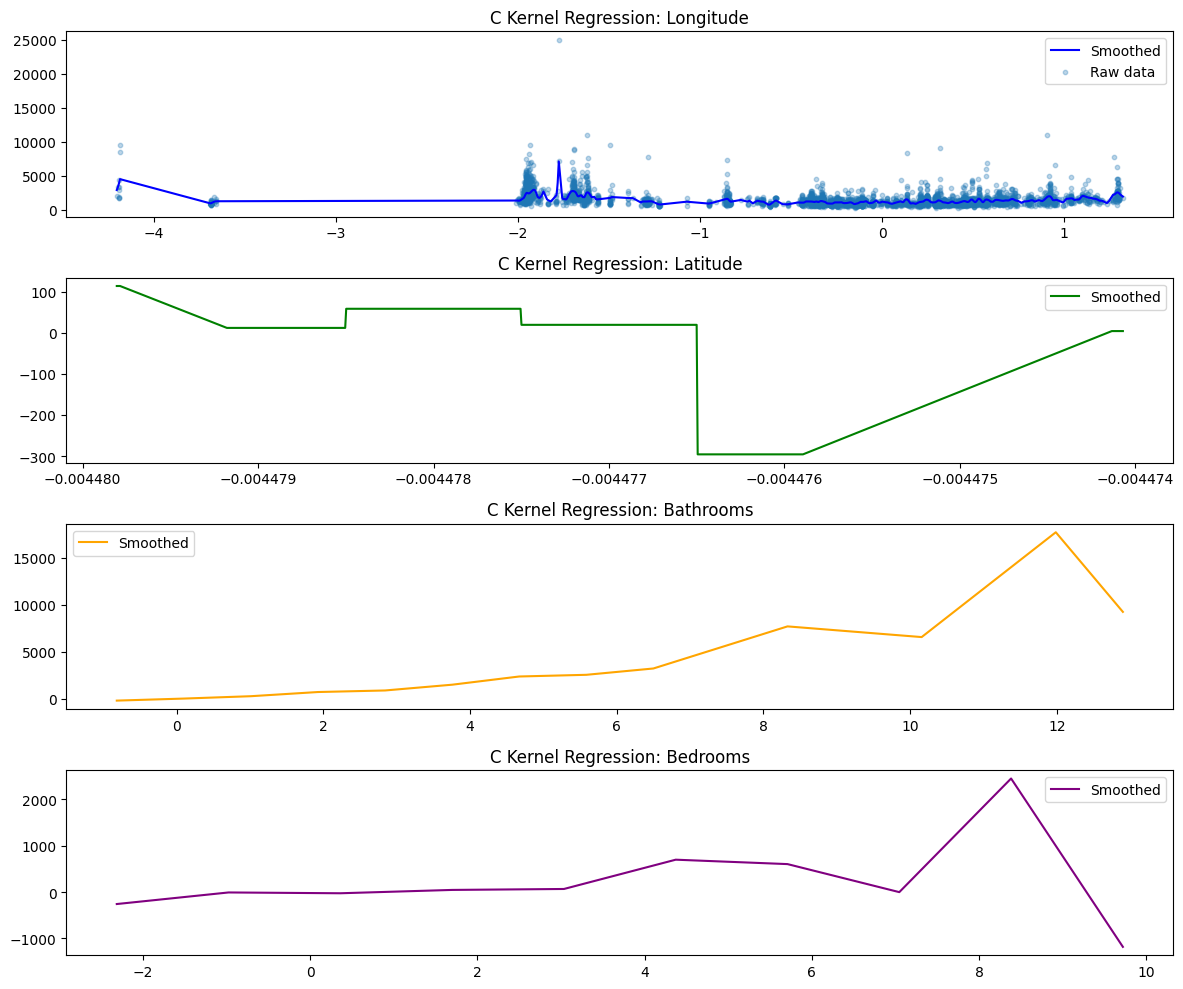

In [13]:
# graphs

# Convert to numpy arrays for plotting
lon_vals = X_lon['longitude'].to_numpy()
lat_vals = X_lat['latitude'].to_numpy()
bath_vals = X_bath['bathrooms'].to_numpy()
bed_vals = X_bed['bedrooms'].to_numpy()

# Sort values for smooth line plots
lon_sorted_idx = np.argsort(lon_vals)
lat_sorted_idx = np.argsort(lat_vals)
bath_sorted_idx = np.argsort(bath_vals)
bed_sorted_idx = np.argsort(bed_vals)

plt.figure(figsize=(12, 10))

# Longitude
plt.subplot(4, 1, 1)
plt.plot(lon_vals[lon_sorted_idx], np.array(fitted_lon)[lon_sorted_idx], color='blue', label='Smoothed')
plt.scatter(lon_vals, y_sub, s=10, alpha=0.3, label='Raw data')
plt.title('C Kernel Regression: Longitude')
plt.legend()

# Latitude
plt.subplot(4, 1, 2)
plt.plot(lat_vals[lat_sorted_idx], np.array(fitted_lat)[lat_sorted_idx], color='green', label='Smoothed')
plt.title('C Kernel Regression: Latitude')
plt.legend()

# Bathrooms
plt.subplot(4, 1, 3)
plt.plot(bath_vals[bath_sorted_idx], np.array(fitted_bath)[bath_sorted_idx], color='orange', label='Smoothed')
plt.title('C Kernel Regression: Bathrooms')
plt.legend()

# Bedrooms
plt.subplot(4, 1, 4)
plt.plot(bed_vals[bed_sorted_idx], np.array(fitted_bed)[bed_sorted_idx], color='purple', label='Smoothed')
plt.title('C Kernel Regression: Bedrooms')
plt.legend()

plt.tight_layout()
plt.show()


Just numeric for NO outlier price

In [14]:
# --- Parameters ---
selected_columns = ['longitude', 'latitude', 'bathrooms', 'bedrooms']
X_sub = X_clean[selected_columns].iloc[:5000].copy()
y_sub = y_clean.iloc[:5000].copy()
num_rows = len(X_sub)
num_grid = num_rows  # full smoothing
X_np = X_sub.to_numpy()
y_np = y_sub.to_numpy()

# --- Step 1: Longitude
X_lon = X_sub[['longitude']]
bandwidth_lon = KernelReg(y_np, X_lon.to_numpy(), var_type='c').bw[0]
fitted_lon = run_kernel_regression_c(X_lon, y_sub, num_rows, num_grid, bandwidth=bandwidth_lon)
resid1 = y_sub - np.array(fitted_lon)

# --- Step 2: Latitude
X_lat = X_sub[['latitude']]
bandwidth_lat = KernelReg(resid1, X_lat.to_numpy(), var_type='c').bw[0]
fitted_lat = run_kernel_regression_c(X_lat, resid1, num_rows, num_grid, bandwidth=bandwidth_lat)
resid2 = resid1 - np.array(fitted_lat)

# --- Step 3: Bathrooms
X_bath = X_sub[['bathrooms']]
bandwidth_bath = KernelReg(resid2, X_bath.to_numpy(), var_type='c').bw[0]
fitted_bath = run_kernel_regression_c(X_bath, resid2, num_rows, num_grid, bandwidth=bandwidth_bath)
resid3 = resid2 - np.array(fitted_bath)

# --- Step 4: Bedrooms
X_bed = X_sub[['bedrooms']]
bandwidth_bed = KernelReg(resid3, X_bed.to_numpy(), var_type='c').bw[0]
fitted_bed = run_kernel_regression_c(X_bed, resid3, num_rows, num_grid, bandwidth=bandwidth_bed)
resid_final = resid3 - np.array(fitted_bed)

# --- Final metrics
rmse = np.sqrt(np.mean(resid_final ** 2))
r2 = 1 - np.sum(resid_final ** 2) / np.sum((y_sub - y_sub.mean()) ** 2)

print(f"Bandwidths: lon={bandwidth_lon:.3f}, lat={bandwidth_lat:.3f}, bath={bandwidth_bath:.3f}, bed={bandwidth_bed:.3f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Bandwidths: lon=0.100, lat=0.000, bath=0.396, bed=1.211
RMSE: 388.0052
R-squared: 0.4311


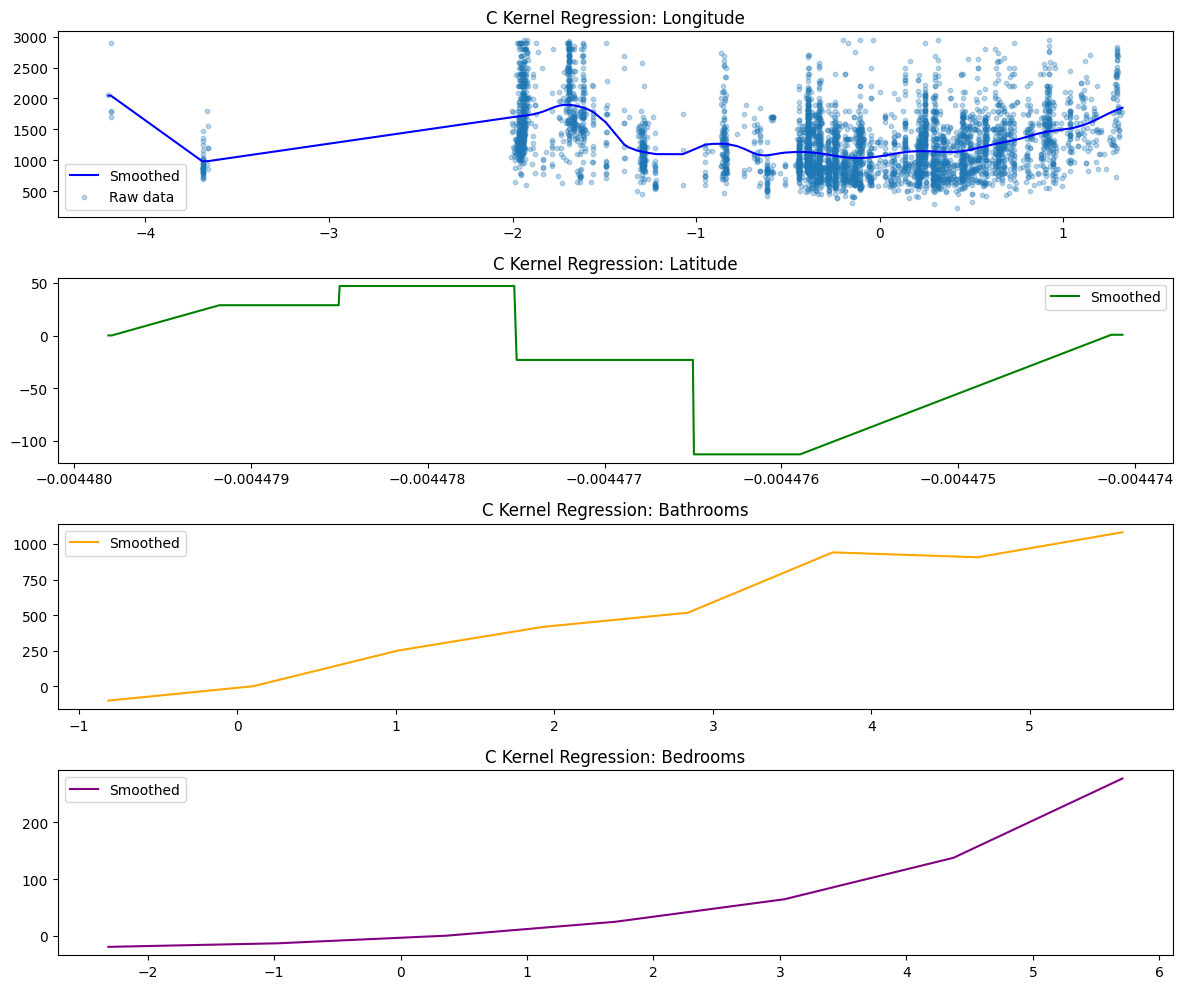

In [16]:
# graphs

# Convert to numpy arrays for plotting
lon_vals = X_lon['longitude'].to_numpy()
lat_vals = X_lat['latitude'].to_numpy()
bath_vals = X_bath['bathrooms'].to_numpy()
bed_vals = X_bed['bedrooms'].to_numpy()

# Sort values for smooth line plots
lon_sorted_idx = np.argsort(lon_vals)
lat_sorted_idx = np.argsort(lat_vals)
bath_sorted_idx = np.argsort(bath_vals)
bed_sorted_idx = np.argsort(bed_vals)

plt.figure(figsize=(12, 10))

# Longitude
plt.subplot(4, 1, 1)
plt.plot(lon_vals[lon_sorted_idx], np.array(fitted_lon)[lon_sorted_idx], color='blue', label='Smoothed')
plt.scatter(lon_vals, y_sub, s=10, alpha=0.3, label='Raw data')
plt.title('C Kernel Regression: Longitude')
plt.legend()

# Latitude
plt.subplot(4, 1, 2)
plt.plot(lat_vals[lat_sorted_idx], np.array(fitted_lat)[lat_sorted_idx], color='green', label='Smoothed')
plt.title('C Kernel Regression: Latitude')
plt.legend()

# Bathrooms
plt.subplot(4, 1, 3)
plt.plot(bath_vals[bath_sorted_idx], np.array(fitted_bath)[bath_sorted_idx], color='orange', label='Smoothed')
plt.title('C Kernel Regression: Bathrooms')
plt.legend()

# Bedrooms
plt.subplot(4, 1, 4)
plt.plot(bed_vals[bed_sorted_idx], np.array(fitted_bed)[bed_sorted_idx], color='purple', label='Smoothed')
plt.title('C Kernel Regression: Bedrooms')
plt.legend()

plt.tight_layout()
plt.show()


All 8 for NO outlier price

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg

# --- Data subset ---
smooth_vars = ['longitude', 'latitude', 'bathrooms', 'bedrooms']
linear_vars = ['state_CA', 'fee_Yes', 'has_photo_Yes', 'pets_allowed_Dogs']
selected_columns = smooth_vars + linear_vars

X_sub = X_clean[selected_columns].iloc[:5000].copy()
y_sub = y_clean.iloc[:5000].copy()

num_rows = len(X_sub)
num_grid = num_rows  # predict at all original points

# --- Step 1: Kernel smoothing on longitude ---
X_lon = X_sub[['longitude']]
bw_lon = KernelReg(y_sub, X_lon, var_type='c').bw[0]
fitted_lon = run_kernel_regression_c(X_lon, y_sub, num_rows, num_grid, bandwidth=bw_lon)
resid1 = y_sub - np.array(fitted_lon)

# --- Step 2: Kernel smoothing on latitude ---
X_lat = X_sub[['latitude']]
bw_lat = KernelReg(resid1, X_lat, var_type='c').bw[0]
fitted_lat = run_kernel_regression_c(X_lat, resid1, num_rows, num_grid, bandwidth=bw_lat)
resid2 = resid1 - np.array(fitted_lat)

# --- Step 3: Kernel smoothing on bathrooms ---
X_bath = X_sub[['bathrooms']]
bw_bath = KernelReg(resid2, X_bath, var_type='c').bw[0]
fitted_bath = run_kernel_regression_c(X_bath, resid2, num_rows, num_grid, bandwidth=bw_bath)
resid3 = resid2 - np.array(fitted_bath)

# --- Step 4: Kernel smoothing on bedrooms ---
X_bed = X_sub[['bedrooms']]
bw_bed = KernelReg(resid3, X_bed, var_type='c').bw[0]
fitted_bed = run_kernel_regression_c(X_bed, resid3, num_rows, num_grid, bandwidth=bw_bed)
resid4 = resid3 - np.array(fitted_bed)

# --- Step 5: Linear regression on binary variables ---
X_lin = X_sub[linear_vars].to_numpy()
X_lin_with_intercept = np.column_stack((np.ones(num_rows), X_lin))
lin_coeffs = np.linalg.lstsq(X_lin_with_intercept, resid4, rcond=None)[0]
intercept = lin_coeffs[0]
slope_vec = lin_coeffs[1:]
fitted_lin = intercept + X_lin @ slope_vec

# --- Step 6: Final residuals ---
resid_final = resid4 - fitted_lin

# --- Step 7: Evaluation ---
rmse = np.sqrt(np.mean(resid_final ** 2))
r_squared = 1 - np.sum(resid_final ** 2) / np.sum((y_sub - y_sub.mean()) ** 2)

print(f"Bandwidths:\n  longitude={bw_lon:.3f}, latitude={bw_lat:.3f}, bathrooms={bw_bath:.3f}, bedrooms={bw_bed:.3f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")


Bandwidths:
  longitude=0.100, latitude=0.000, bathrooms=0.396, bedrooms=1.211
RMSE: 384.0752
R-squared: 0.4425


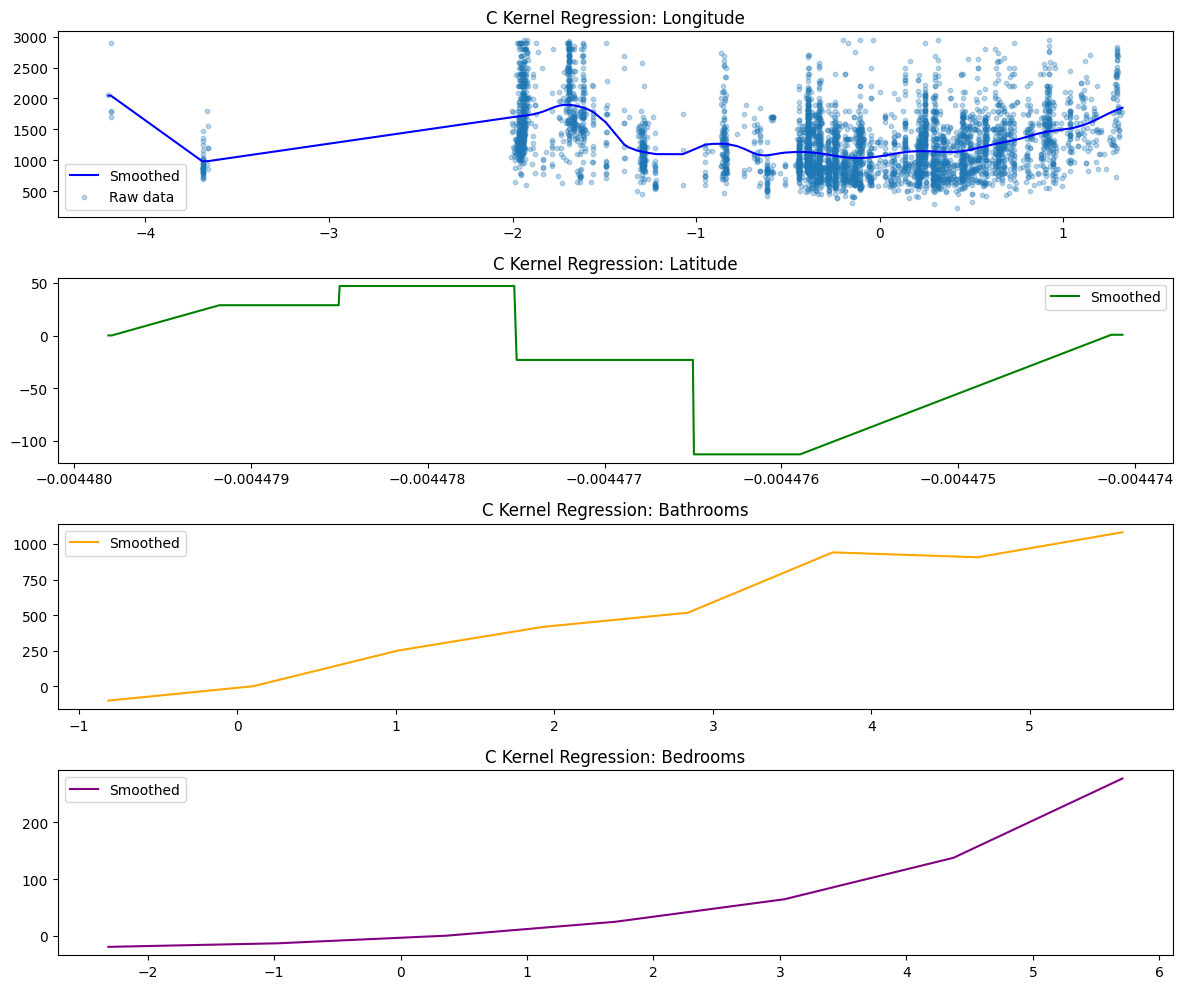

In [17]:
# graphs

# Convert to numpy arrays for plotting
lon_vals = X_lon['longitude'].to_numpy()
lat_vals = X_lat['latitude'].to_numpy()
bath_vals = X_bath['bathrooms'].to_numpy()
bed_vals = X_bed['bedrooms'].to_numpy()

# Sort values for smooth line plots
lon_sorted_idx = np.argsort(lon_vals)
lat_sorted_idx = np.argsort(lat_vals)
bath_sorted_idx = np.argsort(bath_vals)
bed_sorted_idx = np.argsort(bed_vals)

plt.figure(figsize=(12, 10))

# Longitude
plt.subplot(4, 1, 1)
plt.plot(lon_vals[lon_sorted_idx], np.array(fitted_lon)[lon_sorted_idx], color='blue', label='Smoothed')
plt.scatter(lon_vals, y_sub, s=10, alpha=0.3, label='Raw data')
plt.title('C Kernel Regression: Longitude')
plt.legend()

# Latitude
plt.subplot(4, 1, 2)
plt.plot(lat_vals[lat_sorted_idx], np.array(fitted_lat)[lat_sorted_idx], color='green', label='Smoothed')
plt.title('C Kernel Regression: Latitude')
plt.legend()

# Bathrooms
plt.subplot(4, 1, 3)
plt.plot(bath_vals[bath_sorted_idx], np.array(fitted_bath)[bath_sorted_idx], color='orange', label='Smoothed')
plt.title('C Kernel Regression: Bathrooms')
plt.legend()

# Bedrooms
plt.subplot(4, 1, 4)
plt.plot(bed_vals[bed_sorted_idx], np.array(fitted_bed)[bed_sorted_idx], color='purple', label='Smoothed')
plt.title('C Kernel Regression: Bedrooms')
plt.legend()

plt.tight_layout()
plt.show()


## Use C Function for Kernel Regression

### Best Kernel Regression Function:

In [4]:
def run_kernel_regression_c(X, y, bandwidth=1.0, c_filename="kernel_regression.c"):
    # --- Prepare data ---
    num_rows = len(X)
    X = X.to_numpy()
    y = y.to_numpy()
    num_predictors = X.shape[1]

    X_flat = ", ".join(f"{v:.6f}" for v in X.flatten())
    y_flat = ", ".join(f"{v:.6f}" for v in y.flatten())

    # Generate C code that predicts on training points
    c_code = f"""
#include <math.h>
#include <stdio.h>
#include <stdlib.h>

#define NUM_PREDICTORS {num_predictors}

double gaussian_kernel(double *x, double *g, double b) {{
    double dist_squared = 0.0;
    for (int i = 0; i < NUM_PREDICTORS; i++) {{
        dist_squared += pow(x[i] - g[i], 2);
    }}
    return exp(-dist_squared / (2 * b * b));
}}

void kernreg2(double *x, double *y, int n, double b, double *est) {{
    for (int i = 0; i < n; i++) {{
        double a1 = 0.0, a2 = 0.0;
        for (int j = 0; j < n; j++) {{
            double kernel_value = gaussian_kernel(&x[j * NUM_PREDICTORS], &x[i * NUM_PREDICTORS], b);
            a1 += y[j] * kernel_value;
            a2 += kernel_value;
        }}
        if (a2 > 0.0)
            est[i] = a1 / a2;
        else
            est[i] = 0.0;
        printf("Gridpoint %d: Estimated Value = %f\\n", i, est[i]);
    }}
}}

int main() {{
    int n = {num_rows};
    double b = {bandwidth};

    double x[{num_rows * num_predictors}] = {{{X_flat}}};
    double y[{num_rows}] = {{{y_flat}}};

    double est[{num_rows}];
    kernreg2(x, y, n, b, est);
    return 0;
}}
"""

    # --- Save C code to file ---
    with open(c_filename, "w") as f:
        f.write(c_code)

    # --- Compile the code ---
    compile_result = subprocess.run(["gcc", c_filename, "-o", "kernel_regression.exe"],
                                    capture_output=True, text=True)
    if compile_result.returncode != 0:
        print("Compilation failed:\n", compile_result.stderr)
        return None

    # --- Run the executable ---
    run_result = subprocess.run(["./kernel_regression.exe"], capture_output=True, text=True)

    # --- Parse output ---
    estimates = []
    for line in run_result.stdout.strip().split("\n"):
        match = re.search(r"Gridpoint \d+: Estimated Value = ([\d\.\-eE]+)", line)
        if match:
            estimates.append(float(match.group(1)))

    return np.array(estimates)


Pure Multivariate Kernel Regression for all 8 variables, NO price outlier

c:\Users\mieme\Downloads\venv\Lib\site-packages\statsmodels\nonparametric\kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)
c:\Users\mieme\Downloads\venv\Lib\site-packages\statsmodels\nonparametric\kernels.py:62: RuntimeWarning: divide by zero encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)
c:\Users\mieme\Downloads\venv\Lib\site-packages\statsmodels\nonparametric\kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)
c:\Users\mieme\Downloads\venv\Lib\site-packages\statsmodels\nonparametric\kernels.py:62: RuntimeWarning: divide by zero encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)


Bandwidths:
  longitude: 0.1005
  latitude: 0.0000
  bathrooms: 0.3962
  bedrooms: 1.2107
  state_CA: 0.0522
  fee_Yes: 0.0000
  has_photo_Yes: 0.0000
  pets_allowed_Dogs: 0.0228

RMSE: 384.0752
R-squared: 0.4425


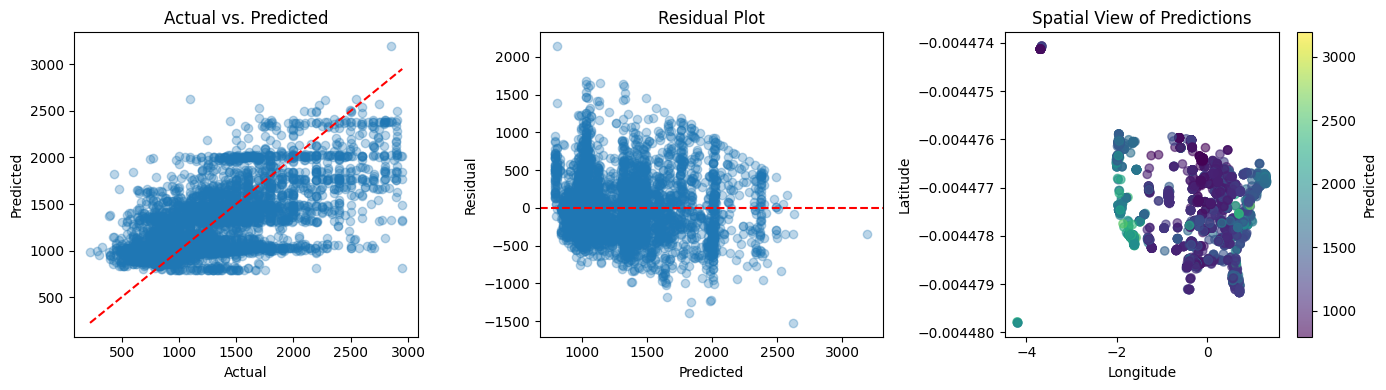

In [ ]:
# --- Variables ---
smooth_vars = ['longitude', 'latitude', 'bathrooms', 'bedrooms']
binary_vars = ['state_CA', 'fee_Yes', 'has_photo_Yes', 'pets_allowed_Dogs']
selected_columns = smooth_vars + binary_vars

# --- Data subset ---
X_sub = X_clean[selected_columns].iloc[:5000].copy()
y_sub = y_clean.iloc[:5000].copy()

num_rows = len(X_sub)

# --- Step 1: Smooth longitude ---
X_lon = X_sub[['longitude']]
bw_lon = KernelReg(y_sub, X_lon, var_type='c').bw[0]
fitted_lon = run_kernel_regression_c(X_lon, y_sub, bandwidth=bw_lon)
resid1 = y_sub - fitted_lon

# --- Step 2: Smooth latitude ---
X_lat = X_sub[['latitude']]
bw_lat = KernelReg(resid1, X_lat, var_type='c').bw[0]
fitted_lat = run_kernel_regression_c(X_lat, resid1, bandwidth=bw_lat)
resid2 = resid1 - fitted_lat

# --- Step 3: Smooth bathrooms ---
X_bath = X_sub[['bathrooms']]
bw_bath = KernelReg(resid2, X_bath, var_type='c').bw[0]
fitted_bath = run_kernel_regression_c(X_bath, resid2, bandwidth=bw_bath)
resid3 = resid2 - fitted_bath

# --- Step 4: Smooth bedrooms ---
X_bed = X_sub[['bedrooms']]
bw_bed = KernelReg(resid3, X_bed, var_type='c').bw[0]
fitted_bed = run_kernel_regression_c(X_bed, resid3, bandwidth=bw_bed)
resid4 = resid3 - fitted_bed

# --- Step 5: Smooth binary variables ---
fitted_bin = np.zeros(num_rows)
binary_bandwidths = []

for var in binary_vars:
    X_bin = X_sub[[var]]
    bw_bin = KernelReg(resid4, X_bin, var_type='u').bw[0]
    binary_bandwidths.append((var, bw_bin))
    fit_bin = run_kernel_regression_c(X_bin, resid4, bandwidth=bw_bin)
    fitted_bin += fit_bin
    resid4 = resid4 - fit_bin

# --- Final prediction ---
fitted_total = (
    fitted_lon
    + fitted_lat
    + fitted_bath
    + fitted_bed
    + fitted_bin
)

# --- Evaluation ---
resid_final = y_sub - fitted_total
rmse = np.sqrt(np.mean(resid_final ** 2))
r_squared = 1 - np.sum(resid_final ** 2) / np.sum((y_sub - y_sub.mean()) ** 2)

# --- Print Bandwidths ---
print("Bandwidths:")
print(f"  longitude: {bw_lon:.4f}")
print(f"  latitude: {bw_lat:.4f}")
print(f"  bathrooms: {bw_bath:.4f}")
print(f"  bedrooms: {bw_bed:.4f}")
for var, bw in binary_bandwidths:
    print(f"  {var}: {bw:.4f}")

print(f"\nRMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")

# --- Plotting ---
plt.figure(figsize=(14, 4))

# 1. Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_sub, fitted_total, alpha=0.3)
plt.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

# 2. Residuals
plt.subplot(1, 3, 2)
plt.scatter(fitted_total, resid_final, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual Plot")

# 3. Spatial Predictions
plt.subplot(1, 3, 3)
plt.scatter(X_sub['longitude'], X_sub['latitude'], c=fitted_total, cmap='viridis', alpha=0.6)
plt.colorbar(label="Predicted")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial View of Predictions")

plt.show()

Just numeric, no price outlier

Bandwidths:
  longitude: 0.1005
  latitude: 0.0000
  bathrooms: 0.3962
  bedrooms: 1.2107

RMSE: 388.0052
R-squared: 0.4311


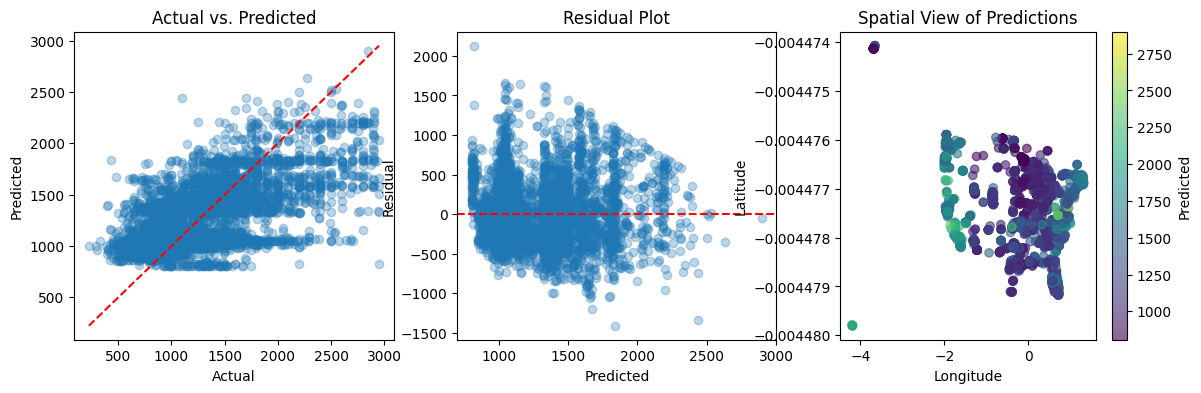

In [26]:
# --- Variables ---
smooth_vars = ['longitude', 'latitude', 'bathrooms', 'bedrooms']
selected_columns = smooth_vars

# --- Data subset ---
X_sub = X_clean[selected_columns].iloc[:5000].copy()
y_sub = y_clean.iloc[:5000].copy()

num_rows = len(X_sub)

# --- Step 1: Smooth longitude ---
X_lon = X_sub[['longitude']]
bw_lon = KernelReg(y_sub, X_lon, var_type='c').bw[0]
fitted_lon = run_kernel_regression_c(X_lon, y_sub, bandwidth=bw_lon)
resid1 = y_sub - fitted_lon

# --- Step 2: Smooth latitude ---
X_lat = X_sub[['latitude']]
bw_lat = KernelReg(resid1, X_lat, var_type='c').bw[0]
fitted_lat = run_kernel_regression_c(X_lat, resid1, bandwidth=bw_lat)
resid2 = resid1 - fitted_lat

# --- Step 3: Smooth bathrooms ---
X_bath = X_sub[['bathrooms']]
bw_bath = KernelReg(resid2, X_bath, var_type='c').bw[0]
fitted_bath = run_kernel_regression_c(X_bath, resid2, bandwidth=bw_bath)
resid3 = resid2 - fitted_bath

# --- Step 4: Smooth bedrooms ---
X_bed = X_sub[['bedrooms']]
bw_bed = KernelReg(resid3, X_bed, var_type='c').bw[0]
fitted_bed = run_kernel_regression_c(X_bed, resid3, bandwidth=bw_bed)
resid4 = resid3 - fitted_bed

# --- Final prediction ---
fitted_total = (
    fitted_lon
    + fitted_lat
    + fitted_bath
    + fitted_bed
)

# --- Evaluation ---
resid_final = y_sub - fitted_total
rmse = np.sqrt(np.mean(resid_final ** 2))
r_squared = 1 - np.sum(resid_final ** 2) / np.sum((y_sub - y_sub.mean()) ** 2)

# --- Print Bandwidths ---
print("Bandwidths:")
print(f"  longitude: {bw_lon:.4f}")
print(f"  latitude: {bw_lat:.4f}")
print(f"  bathrooms: {bw_bath:.4f}")
print(f"  bedrooms: {bw_bed:.4f}")

print(f"\nRMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")

# --- Plotting ---
plt.figure(figsize=(14, 4))

# 1. Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_sub, fitted_total, alpha=0.3)
plt.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

# 2. Residuals
plt.subplot(1, 3, 2)
plt.scatter(fitted_total, resid_final, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual Plot")

# 3. Spatial Predictions
plt.subplot(1, 3, 3)
plt.scatter(X_sub['longitude'], X_sub['latitude'], c=fitted_total, cmap='viridis', alpha=0.6)
plt.colorbar(label="Predicted")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial View of Predictions")

plt.show()

All 8, price outlier included

c:\Users\mieme\Downloads\venv\Lib\site-packages\statsmodels\nonparametric\kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)
c:\Users\mieme\Downloads\venv\Lib\site-packages\statsmodels\nonparametric\kernels.py:62: RuntimeWarning: divide by zero encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)
c:\Users\mieme\Downloads\venv\Lib\site-packages\statsmodels\nonparametric\kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)
c:\Users\mieme\Downloads\venv\Lib\site-packages\statsmodels\nonparametric\kernels.py:62: RuntimeWarning: divide by zero encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)


Bandwidths:
  longitude: -0.0078
  latitude: 0.0000
  bathrooms: 0.3079
  bedrooms: 0.2845
  state_CA: 0.0603
  fee_Yes: 0.0000
  has_photo_Yes: 0.0000
  pets_allowed_Dogs: 0.0236

RMSE: 574.4822
R-squared: 0.6514


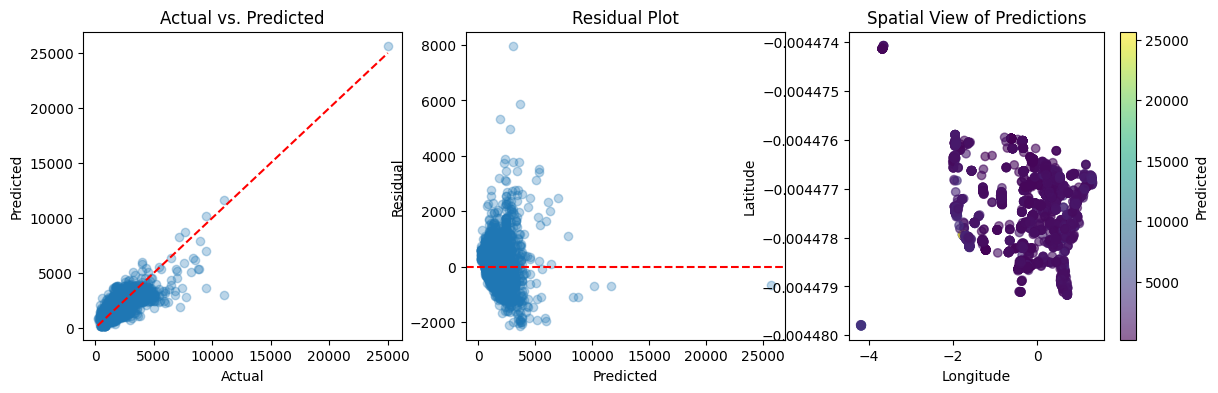

In [25]:
# --- Variables ---
smooth_vars = ['longitude', 'latitude', 'bathrooms', 'bedrooms']
binary_vars = ['state_CA', 'fee_Yes', 'has_photo_Yes', 'pets_allowed_Dogs']
selected_columns = smooth_vars + binary_vars

# --- Data subset ---
X_sub = X_encoded_df[selected_columns].iloc[:5000].copy()
y_sub = y_clean_imputed.iloc[:5000].copy()

num_rows = len(X_sub)

# --- Step 1: Smooth longitude ---
X_lon = X_sub[['longitude']]
bw_lon = KernelReg(y_sub, X_lon, var_type='c').bw[0]
fitted_lon = run_kernel_regression_c(X_lon, y_sub, bandwidth=bw_lon)
resid1 = y_sub - fitted_lon

# --- Step 2: Smooth latitude ---
X_lat = X_sub[['latitude']]
bw_lat = KernelReg(resid1, X_lat, var_type='c').bw[0]
fitted_lat = run_kernel_regression_c(X_lat, resid1, bandwidth=bw_lat)
resid2 = resid1 - fitted_lat

# --- Step 3: Smooth bathrooms ---
X_bath = X_sub[['bathrooms']]
bw_bath = KernelReg(resid2, X_bath, var_type='c').bw[0]
fitted_bath = run_kernel_regression_c(X_bath, resid2, bandwidth=bw_bath)
resid3 = resid2 - fitted_bath

# --- Step 4: Smooth bedrooms ---
X_bed = X_sub[['bedrooms']]
bw_bed = KernelReg(resid3, X_bed, var_type='c').bw[0]
fitted_bed = run_kernel_regression_c(X_bed, resid3, bandwidth=bw_bed)
resid4 = resid3 - fitted_bed

# --- Step 5: Smooth binary variables ---
fitted_bin = np.zeros(num_rows)
binary_bandwidths = []

for var in binary_vars:
    X_bin = X_sub[[var]]
    bw_bin = KernelReg(resid4, X_bin, var_type='u').bw[0]
    binary_bandwidths.append((var, bw_bin))
    fit_bin = run_kernel_regression_c(X_bin, resid4, bandwidth=bw_bin)
    fitted_bin += fit_bin
    resid4 = resid4 - fit_bin

# --- Final prediction ---
fitted_total = (
    fitted_lon
    + fitted_lat
    + fitted_bath
    + fitted_bed
    + fitted_bin
)

# --- Evaluation ---
resid_final = y_sub - fitted_total
rmse = np.sqrt(np.mean(resid_final ** 2))
r_squared = 1 - np.sum(resid_final ** 2) / np.sum((y_sub - y_sub.mean()) ** 2)

# --- Print Bandwidths ---
print("Bandwidths:")
print(f"  longitude: {bw_lon:.4f}")
print(f"  latitude: {bw_lat:.4f}")
print(f"  bathrooms: {bw_bath:.4f}")
print(f"  bedrooms: {bw_bed:.4f}")
for var, bw in binary_bandwidths:
    print(f"  {var}: {bw:.4f}")

print(f"\nRMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")

# --- Plotting ---
plt.figure(figsize=(14, 4))

# 1. Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_sub, fitted_total, alpha=0.3)
plt.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

# 2. Residuals
plt.subplot(1, 3, 2)
plt.scatter(fitted_total, resid_final, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual Plot")

# 3. Spatial Predictions
plt.subplot(1, 3, 3)
plt.scatter(X_sub['longitude'], X_sub['latitude'], c=fitted_total, cmap='viridis', alpha=0.6)
plt.colorbar(label="Predicted")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial View of Predictions")

plt.show()

Just numeric, outlier included

Bandwidths:
  longitude: -0.0078
  latitude: 0.0000
  bathrooms: 0.3079
  bedrooms: 0.2845

RMSE: 577.5445
R-squared: 0.6477


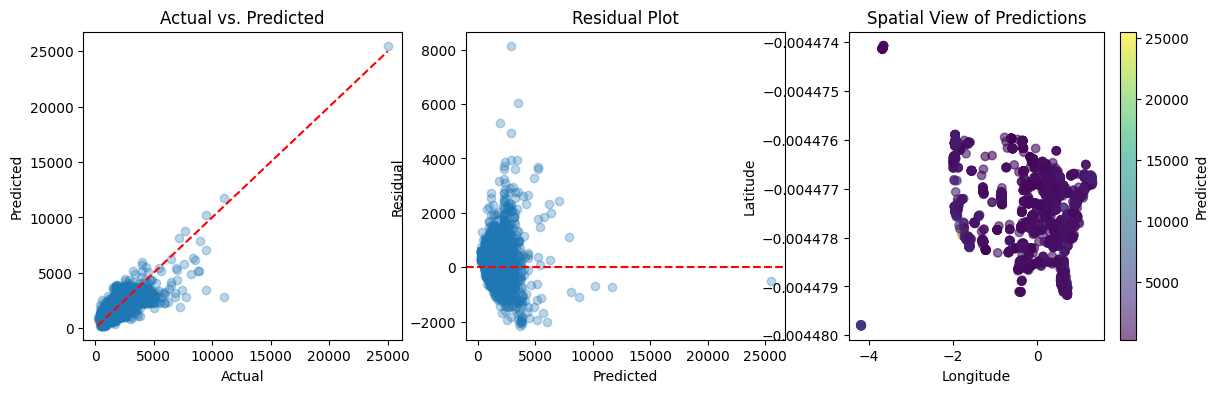

In [27]:
# --- Variables ---
smooth_vars = ['longitude', 'latitude', 'bathrooms', 'bedrooms']
selected_columns = smooth_vars

# --- Data subset ---
X_sub = X_encoded_df[selected_columns].iloc[:5000].copy()
y_sub = y_clean_imputed.iloc[:5000].copy()

num_rows = len(X_sub)

# --- Step 1: Smooth longitude ---
X_lon = X_sub[['longitude']]
bw_lon = KernelReg(y_sub, X_lon, var_type='c').bw[0]
fitted_lon = run_kernel_regression_c(X_lon, y_sub, bandwidth=bw_lon)
resid1 = y_sub - fitted_lon

# --- Step 2: Smooth latitude ---
X_lat = X_sub[['latitude']]
bw_lat = KernelReg(resid1, X_lat, var_type='c').bw[0]
fitted_lat = run_kernel_regression_c(X_lat, resid1, bandwidth=bw_lat)
resid2 = resid1 - fitted_lat

# --- Step 3: Smooth bathrooms ---
X_bath = X_sub[['bathrooms']]
bw_bath = KernelReg(resid2, X_bath, var_type='c').bw[0]
fitted_bath = run_kernel_regression_c(X_bath, resid2, bandwidth=bw_bath)
resid3 = resid2 - fitted_bath

# --- Step 4: Smooth bedrooms ---
X_bed = X_sub[['bedrooms']]
bw_bed = KernelReg(resid3, X_bed, var_type='c').bw[0]
fitted_bed = run_kernel_regression_c(X_bed, resid3, bandwidth=bw_bed)
resid4 = resid3 - fitted_bed

# --- Final prediction ---
fitted_total = (
    fitted_lon
    + fitted_lat
    + fitted_bath
    + fitted_bed
)

# --- Evaluation ---
resid_final = y_sub - fitted_total
rmse = np.sqrt(np.mean(resid_final ** 2))
r_squared = 1 - np.sum(resid_final ** 2) / np.sum((y_sub - y_sub.mean()) ** 2)

# --- Print Bandwidths ---
print("Bandwidths:")
print(f"  longitude: {bw_lon:.4f}")
print(f"  latitude: {bw_lat:.4f}")
print(f"  bathrooms: {bw_bath:.4f}")
print(f"  bedrooms: {bw_bed:.4f}")

print(f"\nRMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")

# --- Plotting ---
plt.figure(figsize=(14, 4))

# 1. Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_sub, fitted_total, alpha=0.3)
plt.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

# 2. Residuals
plt.subplot(1, 3, 2)
plt.scatter(fitted_total, resid_final, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual Plot")

# 3. Spatial Predictions
plt.subplot(1, 3, 3)
plt.scatter(X_sub['longitude'], X_sub['latitude'], c=fitted_total, cmap='viridis', alpha=0.6)
plt.colorbar(label="Predicted")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial View of Predictions")

plt.show()

## C Function Kernel Regression for 4 numeric: order is bathroom, bedroom, longitude, latitude (BEST)

Price outlier included

c:\Users\mieme\Downloads\venv\Lib\site-packages\numpy\linalg\_linalg.py:2276: RuntimeWarning: overflow encountered in divide
  s = divide(1, s, where=large, out=s)
c:\Users\mieme\Downloads\venv\Lib\site-packages\numpy\linalg\_linalg.py:2279: RuntimeWarning: invalid value encountered in multiply
  res = matmul(transpose(vt), multiply(s[..., newaxis], transpose(u)))
c:\Users\mieme\Downloads\venv\Lib\site-packages\numpy\linalg\_linalg.py:3437: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


Bandwidths:
  longitude: 0.0000
  latitude: 2.2442
  bathrooms: 0.3079
  bedrooms: 0.2845

RMSE: 408.8118
R-squared: 0.8235


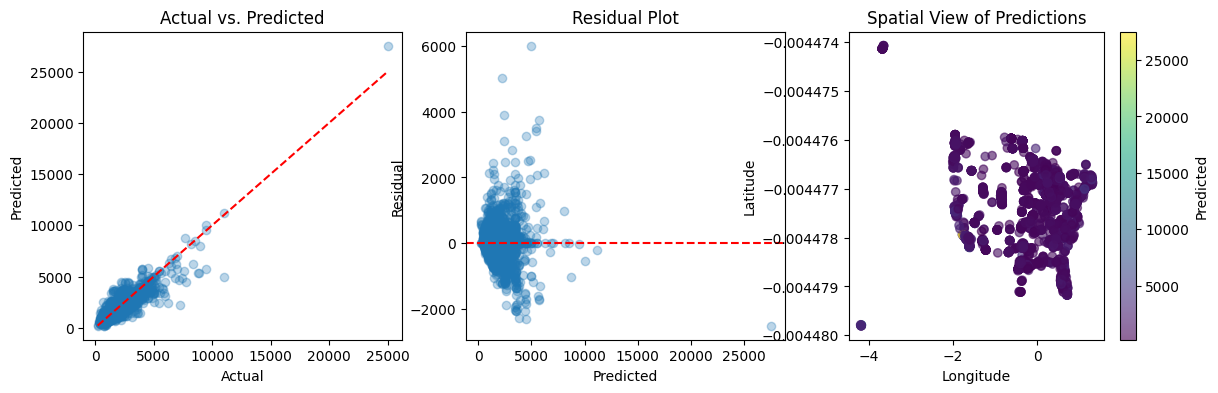

In [7]:
# --- Variables ---
smooth_vars = ['bathrooms', 'bedrooms', 'longitude', 'latitude'] #order of correlation 
selected_columns = smooth_vars

# --- Data subset ---
X_sub = X_encoded_df[selected_columns].iloc[:5000].copy()
y_sub = y_clean_imputed.iloc[:5000].copy()

num_rows = len(X_sub)

# --- Step 1: Smooth bathrooms ---
X_bath = X_sub[['bathrooms']]
bw_bath = KernelReg(y_sub, X_bath, var_type='c').bw[0]
fitted_bath = run_kernel_regression_c(X_bath, y_sub, bandwidth=bw_bath)
resid1 = y_sub - fitted_bath

# --- Step 2: Smooth bedrooms ---
X_bed = X_sub[['bedrooms']]
bw_bed = KernelReg(resid1, X_bed, var_type='c').bw[0]
fitted_bed = run_kernel_regression_c(X_bed, resid1, bandwidth=bw_bed)
resid2 = resid1 - fitted_bed

# --- Step 3: Smooth longitude ---
X_lon = X_sub[['longitude']]
bw_lon = KernelReg(resid2, X_lon, var_type='c').bw[0]
fitted_lon = run_kernel_regression_c(X_lon, resid2, bandwidth=bw_lon)
resid3 = resid2 - fitted_lon

# --- Step 4: Smooth latitude ---
X_lat = X_sub[['latitude']]
bw_lat = KernelReg(resid3, X_lat, var_type='c').bw[0]
fitted_lat = run_kernel_regression_c(X_lat, resid3, bandwidth=bw_lat)
resid4 = resid3 - fitted_lat

# --- Final prediction ---
fitted_total = (
    fitted_lon
    + fitted_lat
    + fitted_bath
    + fitted_bed
)

# --- Evaluation ---
resid_final = y_sub - fitted_total
rmse = np.sqrt(np.mean(resid_final ** 2))
r_squared = 1 - np.sum(resid_final ** 2) / np.sum((y_sub - y_sub.mean()) ** 2)

# --- Print Bandwidths ---
print("Bandwidths:")
print(f"  longitude: {bw_lon:.4f}")
print(f"  latitude: {bw_lat:.4f}")
print(f"  bathrooms: {bw_bath:.4f}")
print(f"  bedrooms: {bw_bed:.4f}")

print(f"\nRMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")

# --- Plotting ---
plt.figure(figsize=(14, 4))

# 1. Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_sub, fitted_total, alpha=0.3)
plt.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

# 2. Residuals
plt.subplot(1, 3, 2)
plt.scatter(fitted_total, resid_final, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual Plot")

# 3. Spatial Predictions
plt.subplot(1, 3, 3)
plt.scatter(X_sub['longitude'], X_sub['latitude'], c=fitted_total, cmap='viridis', alpha=0.6)
plt.colorbar(label="Predicted")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial View of Predictions")

plt.show()

Price outlier not included

Bandwidths:
  longitude: 0.0973
  latitude: 0.0000
  bathrooms: 0.3301
  bedrooms: 0.6296

RMSE: 383.2130
R-squared: 0.4450


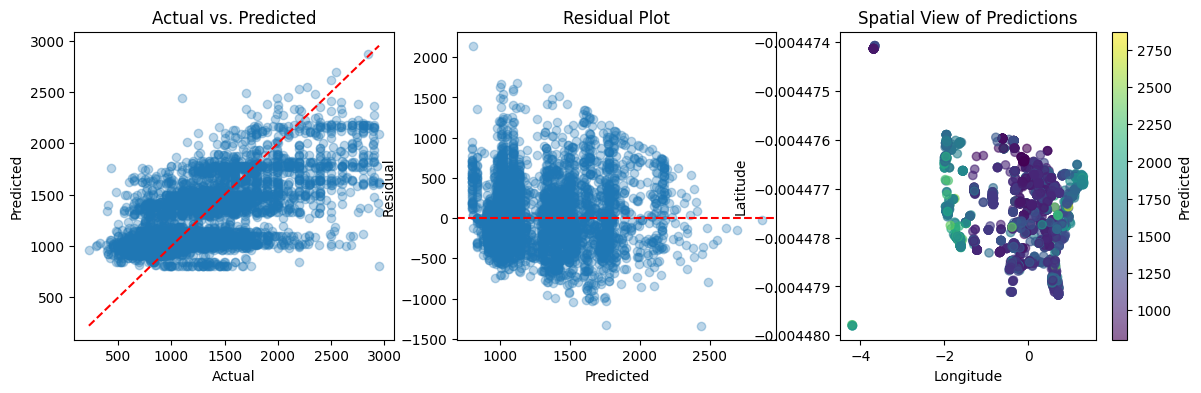

In [8]:
# --- Variables ---
smooth_vars = ['bathrooms', 'bedrooms', 'longitude', 'latitude'] #order of correlation 
selected_columns = smooth_vars

# --- Data subset ---
X_sub = X_clean[selected_columns].iloc[:5000].copy()
y_sub = y_clean.iloc[:5000].copy()

num_rows = len(X_sub)

# --- Step 1: Smooth bathrooms ---
X_bath = X_sub[['bathrooms']]
bw_bath = KernelReg(y_sub, X_bath, var_type='c').bw[0]
fitted_bath = run_kernel_regression_c(X_bath, y_sub, bandwidth=bw_bath)
resid1 = y_sub - fitted_bath

# --- Step 2: Smooth bedrooms ---
X_bed = X_sub[['bedrooms']]
bw_bed = KernelReg(resid1, X_bed, var_type='c').bw[0]
fitted_bed = run_kernel_regression_c(X_bed, resid1, bandwidth=bw_bed)
resid2 = resid1 - fitted_bed

# --- Step 3: Smooth longitude ---
X_lon = X_sub[['longitude']]
bw_lon = KernelReg(resid2, X_lon, var_type='c').bw[0]
fitted_lon = run_kernel_regression_c(X_lon, resid2, bandwidth=bw_lon)
resid3 = resid2 - fitted_lon

# --- Step 4: Smooth latitude ---
X_lat = X_sub[['latitude']]
bw_lat = KernelReg(resid3, X_lat, var_type='c').bw[0]
fitted_lat = run_kernel_regression_c(X_lat, resid3, bandwidth=bw_lat)
resid4 = resid3 - fitted_lat

# --- Final prediction ---
fitted_total = (
    fitted_lon
    + fitted_lat
    + fitted_bath
    + fitted_bed
)

# --- Evaluation ---
resid_final = y_sub - fitted_total
rmse = np.sqrt(np.mean(resid_final ** 2))
r_squared = 1 - np.sum(resid_final ** 2) / np.sum((y_sub - y_sub.mean()) ** 2)

# --- Print Bandwidths ---
print("Bandwidths:")
print(f"  longitude: {bw_lon:.4f}")
print(f"  latitude: {bw_lat:.4f}")
print(f"  bathrooms: {bw_bath:.4f}")
print(f"  bedrooms: {bw_bed:.4f}")

print(f"\nRMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")

# --- Plotting ---
plt.figure(figsize=(14, 4))

# 1. Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_sub, fitted_total, alpha=0.3)
plt.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

# 2. Residuals
plt.subplot(1, 3, 2)
plt.scatter(fitted_total, resid_final, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual Plot")

# 3. Spatial Predictions
plt.subplot(1, 3, 3)
plt.scatter(X_sub['longitude'], X_sub['latitude'], c=fitted_total, cmap='viridis', alpha=0.6)
plt.colorbar(label="Predicted")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial View of Predictions")

plt.show()

GAM/KR 3 Outliers

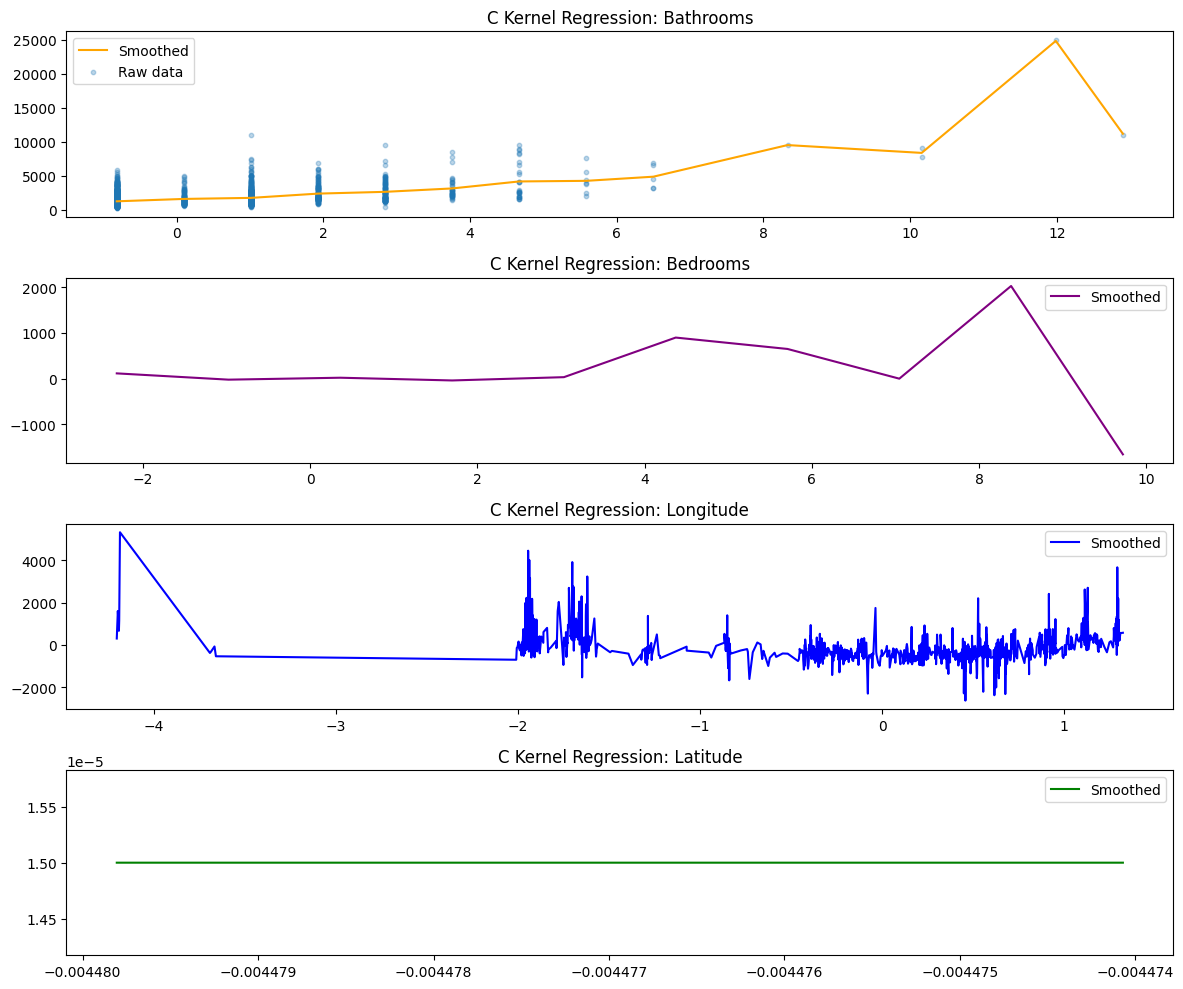

In [8]:
plt.figure(figsize=(12, 10))

# Bathrooms
plt.subplot(4, 1, 1)
plt.plot(bath_vals[bath_sorted_idx], np.array(fitted_bath)[bath_sorted_idx], color='orange', label='Smoothed')
plt.scatter(bath_vals, y_sub, s=10, alpha=0.3, label='Raw data')
plt.title('C Kernel Regression: Bathrooms')
plt.legend()

# Bedrooms
plt.subplot(4, 1, 2)
plt.plot(bed_vals[bed_sorted_idx], np.array(fitted_bed)[bed_sorted_idx], color='purple', label='Smoothed')
plt.title('C Kernel Regression: Bedrooms')
plt.legend()

# Longitude
plt.subplot(4, 1, 3)
plt.plot(lon_vals[lon_sorted_idx], np.array(fitted_lon)[lon_sorted_idx], color='blue', label='Smoothed')
plt.title('C Kernel Regression: Longitude')
plt.legend()

# Latitude
plt.subplot(4, 1, 4)
plt.plot(lat_vals[lat_sorted_idx], np.array(fitted_lat)[lat_sorted_idx], color='green', label='Smoothed')
plt.title('C Kernel Regression: Latitude')
plt.legend()

plt.tight_layout()
plt.show()


GAM/KR 3 No outliers

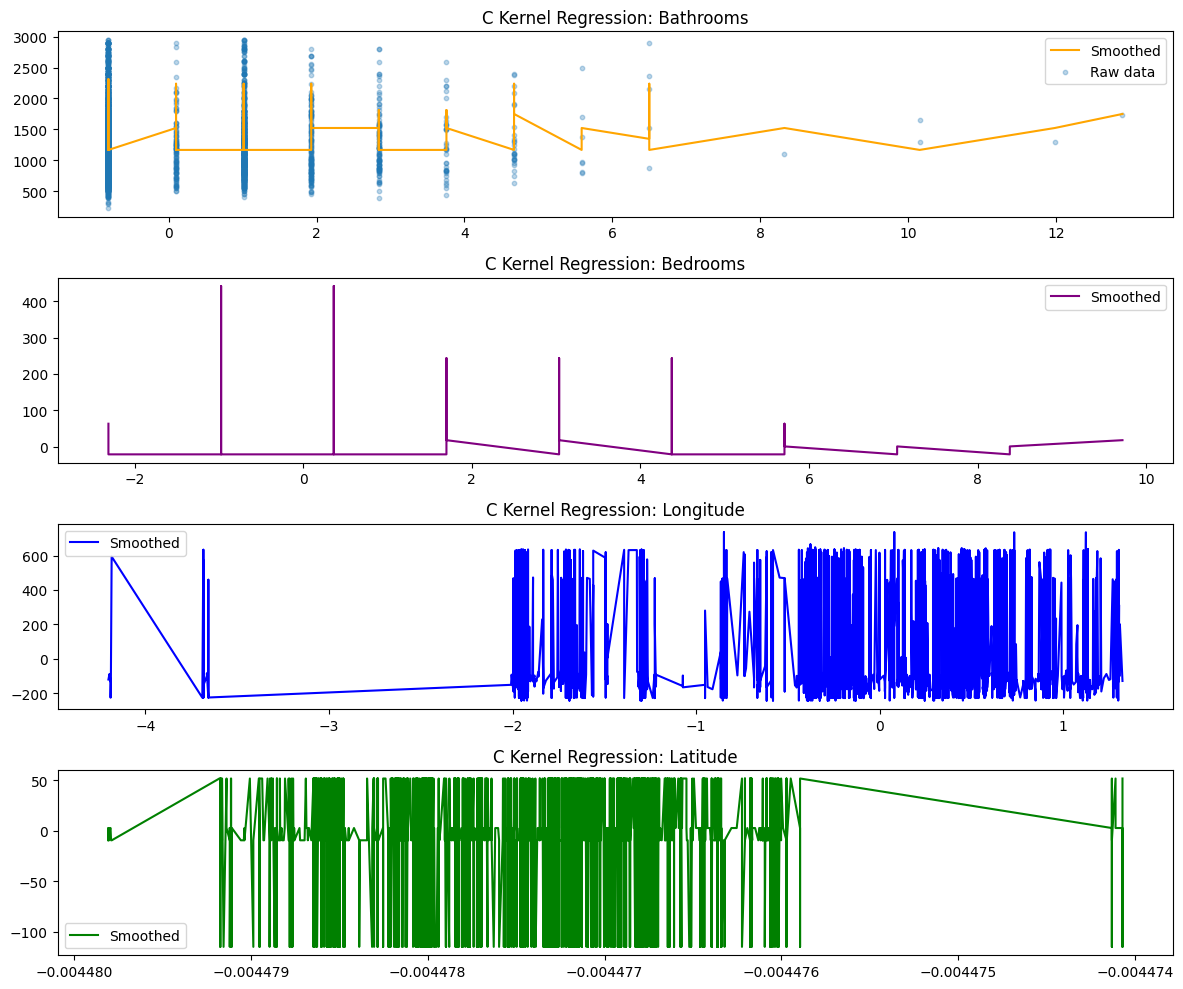

In [ ]:
# --- Variables ---
smooth_vars = ['bathrooms', 'bedrooms', 'longitude', 'latitude'] #order of correlation 
selected_columns = smooth_vars

# --- Data subset ---
X_sub = X_clean[selected_columns].iloc[:5000].copy()
y_sub = y_clean.iloc[:5000].copy()

num_rows = len(X_sub)

# --- Step 1: Smooth bathrooms ---
X_bath = X_sub[['bathrooms']]
bw_bath = KernelReg(y_sub, X_bath, var_type='c').bw[0]
fitted_bath = run_kernel_regression_c(X_bath, y_sub, bandwidth=bw_bath)
resid1 = y_sub - fitted_bath

# --- Step 2: Smooth bedrooms ---
X_bed = X_sub[['bedrooms']]
bw_bed = KernelReg(resid1, X_bed, var_type='c').bw[0]
fitted_bed = run_kernel_regression_c(X_bed, resid1, bandwidth=bw_bed)
resid2 = resid1 - fitted_bed

# --- Step 3: Smooth longitude ---
X_lon = X_sub[['longitude']]
bw_lon = KernelReg(resid2, X_lon, var_type='c').bw[0]
fitted_lon = run_kernel_regression_c(X_lon, resid2, bandwidth=bw_lon)
resid3 = resid2 - fitted_lon

# --- Step 4: Smooth latitude ---
X_lat = X_sub[['latitude']]
bw_lat = KernelReg(resid3, X_lat, var_type='c').bw[0]
fitted_lat = run_kernel_regression_c(X_lat, resid3, bandwidth=bw_lat)
resid4 = resid3 - fitted_lat

# --- Final prediction ---
fitted_total = (
    fitted_lon
    + fitted_lat
    + fitted_bath
    + fitted_bed
)

# --- Evaluation ---
resid_final = y_sub - fitted_total
rmse = np.sqrt(np.mean(resid_final ** 2))
r_squared = 1 - np.sum(resid_final ** 2) / np.sum((y_sub - y_sub.mean()) ** 2)

plt.figure(figsize=(12, 10))

# Bathrooms
plt.subplot(4, 1, 1)
plt.plot(bath_vals[bath_sorted_idx], np.array(fitted_bath)[bath_sorted_idx], color='orange', label='Smoothed')
plt.scatter(bath_vals, y_sub, s=10, alpha=0.3, label='Raw data')
plt.title('C Kernel Regression: Bathrooms')
plt.legend()

# Bedrooms
plt.subplot(4, 1, 2)
plt.plot(bed_vals[bed_sorted_idx], np.array(fitted_bed)[bed_sorted_idx], color='purple', label='Smoothed')
plt.title('C Kernel Regression: Bedrooms')
plt.legend()

# Longitude
plt.subplot(4, 1, 3)
plt.plot(lon_vals[lon_sorted_idx], np.array(fitted_lon)[lon_sorted_idx], color='blue', label='Smoothed')
plt.title('C Kernel Regression: Longitude')
plt.legend()

# Latitude
plt.subplot(4, 1, 4)
plt.plot(lat_vals[lat_sorted_idx], np.array(fitted_lat)[lat_sorted_idx], color='green', label='Smoothed')
plt.title('C Kernel Regression: Latitude')
plt.legend()

plt.tight_layout()
plt.show()